# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

According to the article, there were **17 campaigns** between **May 2008** and **Nov 2010**. These **phone campaings** focused on offered **long-term deposits** with **good interest rates**. The **success** was determined if the **customer subscribed to the long-term deposits**.

From the article:
"The dataset collected is related to 17 campaigns that occurred between May 2008 and November 2010, corresponding to a total of 79354 contacts. During these phone campaigns, an attractive long-term deposit application, with good interest rates, was offered. For each contact, a large number of attributes was stored (e.g. see Table 2) and if there was a success (the target variable). For the whole database considered, there were 6499 successes (8% success rate)." 

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import timeit
%matplotlib inline

In [2]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [3]:
df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:

# bank client data:

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

# related with the last contact of the current campaign:

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

# other attributes:

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

# social and economic context attributes

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
df = df.rename(columns={'emp.var.rate':'emp_var_rate',
                        'cons.price.idx':'cons_price_idx',
                        'cons.conf.idx':'cons_conf_idx',
                        'nr.employed':'nr_employed'})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [6]:
df.describe()

age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp_var_rate  cons_price_idx  cons_conf_idx     euribor3m   nr_employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198      1.734447     72.251528  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

Let's explore some of the columns and its values to learn more about the data. Once we have good understanding, we can determine if any of the features can be dropped from the analysis

In [7]:
# Let's first find out how many unique values each column has

print ('Column          Unique Values')
for col in df.columns:
    print (f'{col:15} {df[col].nunique()}')

Column          Unique Values
age             78
job             12
marital         4
education       8
default         3
housing         3
loan            3
contact         2
month           10
day_of_week     5
duration        1544
campaign        42
pdays           27
previous        8
poutcome        3
emp_var_rate    10
cons_price_idx  26
cons_conf_idx   26
euribor3m       316
nr_employed     11
y               2


In [8]:
# Let's find out the values for any column that has 12 or fewer unique values

for col in df.columns:
    if df[col].nunique() < 13:
        print ('unique values for column:', col)
        print (df[col].unique().tolist())

unique values for column: job
['housemaid', 'services', 'admin.', 'blue-collar', 'technician', 'retired', 'management', 'unemployed', 'self-employed', 'unknown', 'entrepreneur', 'student']
unique values for column: marital
['married', 'single', 'divorced', 'unknown']
unique values for column: education
['basic.4y', 'high.school', 'basic.6y', 'basic.9y', 'professional.course', 'unknown', 'university.degree', 'illiterate']
unique values for column: default
['no', 'unknown', 'yes']
unique values for column: housing
['no', 'yes', 'unknown']
unique values for column: loan
['no', 'yes', 'unknown']
unique values for column: contact
['telephone', 'cellular']
unique values for column: month
['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr', 'sep']
unique values for column: day_of_week
['mon', 'tue', 'wed', 'thu', 'fri']
unique values for column: previous
[0, 1, 2, 3, 4, 5, 6, 7]
unique values for column: poutcome
['nonexistent', 'failure', 'success']
unique values for column: emp_v

In [9]:
# Let's review if day of week would be an important attribute to use for analysis

df_grouped = df.groupby(['day_of_week'])['day_of_week'].count().transform(lambda x: x / x.sum() * 100)
df_grouped

day_of_week
fri    19.003108
mon    20.671069
thu    20.935709
tue    19.641643
wed    19.748470
Name: day_of_week, dtype: float64

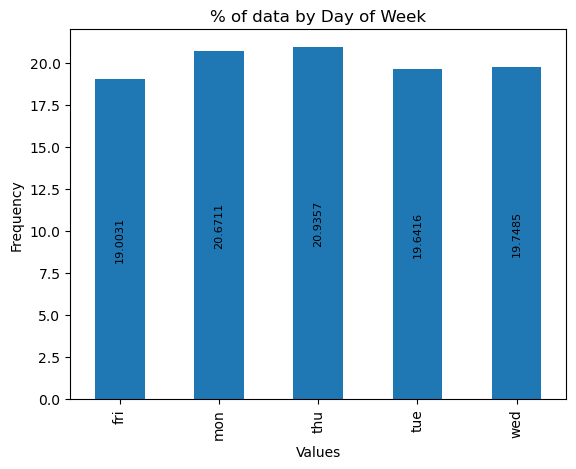

In [10]:
ax = df_grouped.plot(kind='bar')
ax.bar_label(ax.containers[0], label_type='center', fontsize=8, rotation=90)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('% of data by Day of Week')
plt.show()

**Observation**

Looks like we have even distribution of the data across the 5 working days (Mon, Tue, Wed, Thu, and Fri). Each of them are 20% of the overall distribution of data.

Let's see if the day of the week helped determine if the customer subscribed to the CD promotion.

In [11]:
# Let's review if day of week would be an important attribute to use for analysis

df_grouped = df.groupby(['y','day_of_week'])['y'].count().transform(lambda x: round(x / x.sum() * 100,2))
df_grouped

y    day_of_week
no   fri            16.95
     mon            18.61
     thu            18.40
     tue            17.33
     wed            17.44
yes  fri             2.05
     mon             2.06
     thu             2.54
     tue             2.31
     wed             2.30
Name: y, dtype: float64

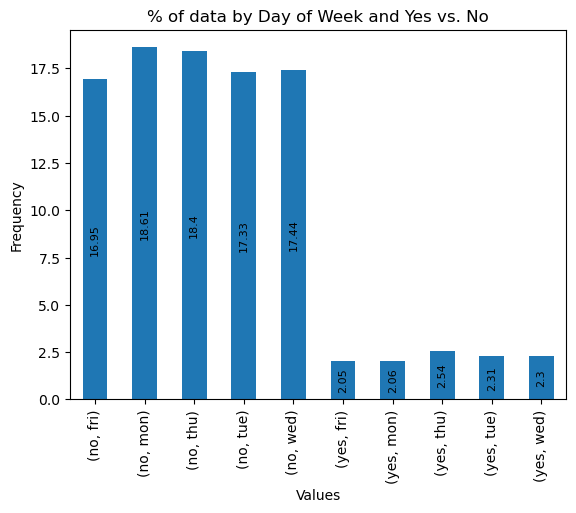

In [12]:
ax = df_grouped.plot(kind='bar')
ax.bar_label(ax.containers[0], label_type='center', fontsize=8, rotation=90)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('% of data by Day of Week and Yes vs. No')
plt.show()

**Observation**

Based on the output above, it looks like the distribution did not result in helping support the promotion. We can drop this attribute from further analysis.

In [13]:
# Let's create a new copy of the dataframe and use that as the target refined dataframe for our analysis
df_revised = df.copy()

# Let's drop the day_of_week column as it is not relevant for our analysis anymore

df_revised.drop(columns='day_of_week',axis=1, inplace=True)
df_revised.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx',
       'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [14]:
# Let's review if number of employed would be an important attribute to use for analysis

df_grouped = df.groupby(['nr_employed'])['nr_employed'].count().transform(lambda x: x / x.sum() * 100)
df_grouped

nr_employed
4963.6     1.541711
4991.6     1.876760
5008.7     1.578130
5017.5     2.600272
5023.5     0.417597
5076.2     4.037584
5099.1    20.719627
5176.3     0.024279
5191.0    18.847723
5195.8     8.941925
5228.1    39.414393
Name: nr_employed, dtype: float64

In [15]:
# Let's review if day of week would be an important attribute to use for analysis

df_grouped = df.groupby(['nr_employed','y'])['y'].count().transform(lambda x: round(x / x.sum() * 100,2))
df_grouped

nr_employed  y  
4963.6       no      0.81
             yes     0.73
4991.6       no      0.90
             yes     0.98
5008.7       no      0.68
             yes     0.90
5017.5       no      1.50
             yes     1.10
5023.5       no      0.20
             yes     0.21
5076.2       no      2.60
             yes     1.44
5099.1       no     18.07
             yes     2.65
5176.3       no      0.02
             yes     0.00
5191.0       no     18.27
             yes     0.58
5195.8       no      8.38
             yes     0.56
5228.1       no     37.31
             yes     2.10
Name: y, dtype: float64

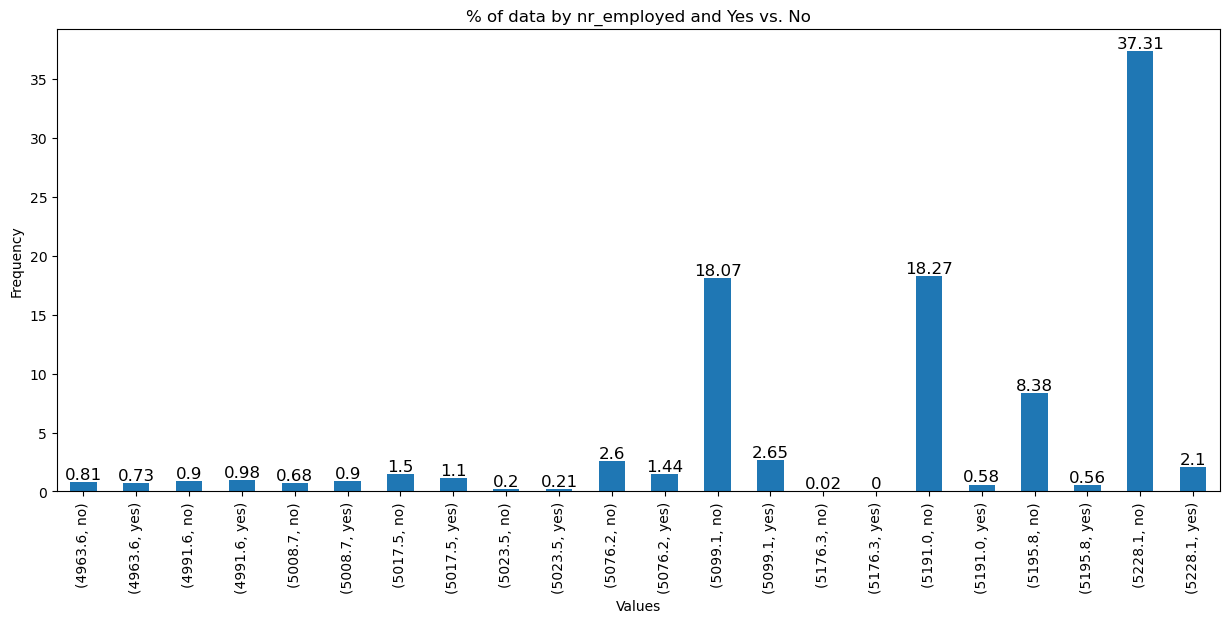

In [16]:
plt.figure(figsize=(15,6))
ax = df_grouped.plot(kind='bar')
ax.bar_label(ax.containers[0], label_type='edge', fontsize=12, rotation=0)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('% of data by nr_employed and Yes vs. No')
plt.show()

**Observation**
Other than nr_employed value 5076.2 which has a higher % of conversion, and 5228.1 with a lower % of conversion, this data does not provide good insight. We can ignore this for the analysis and determine if this needs to be further used if our accuracy rates are impacted.

In [17]:
# Let's drop the nr_employed column as it is not relevant for our analysis anymore

df_revised.drop(columns='nr_employed',axis=1, inplace=True)
df_revised.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx',
       'euribor3m', 'y'],
      dtype='object')

In [18]:
# Similarly, let's review euribor3m

# Let's review if euribor3m would be an important attribute to use for analysis

df_grouped = df.groupby(['euribor3m'])['euribor3m'].count().transform(lambda x: x / x.sum() * 100)
df_grouped[df_grouped > 1.0]

euribor3m
1.244    1.024570
1.250    1.425172
1.266    1.990871
1.281    1.546567
1.291    1.320773
1.299    1.262504
1.313    1.194523
1.327    1.306206
1.334    1.170244
1.405    2.838205
4.021    1.641255
4.076    1.995727
4.120    1.835486
4.153    1.675245
4.191    1.481014
4.855    2.039429
4.856    2.937749
4.857    6.963193
4.858    1.779645
4.859    1.913179
4.860    2.165679
4.864    2.534719
4.957    1.303778
4.958    1.410605
4.959    2.172963
4.960    2.459454
4.961    4.617850
4.962    6.344081
4.963    6.038166
4.964    2.852773
4.965    2.600272
4.966    1.510149
4.967    1.561134
4.968    2.408468
Name: euribor3m, dtype: float64

In [19]:
# Let's review if day of week would be an important attribute to use for analysis

df_grouped = df.groupby(['euribor3m','y'])['y'].count().transform(lambda x: round(x / x.sum() * 100,2))
df_grouped[df_grouped > 1]

euribor3m  y 
1.250      no    1.28
1.266      no    1.74
1.281      no    1.39
1.291      no    1.22
1.299      no    1.20
1.313      no    1.14
1.327      no    1.23
1.334      no    1.09
1.405      no    2.51
4.021      no    1.55
4.076      no    1.87
4.120      no    1.73
4.153      no    1.63
4.191      no    1.43
4.855      no    1.99
4.856      no    2.86
4.857      no    6.79
4.858      no    1.71
4.859      no    1.84
4.860      no    2.07
4.864      no    2.41
4.957      no    1.18
4.958      no    1.33
4.959      no    2.08
4.960      no    2.32
4.961      no    4.40
4.962      no    5.99
4.963      no    5.73
4.964      no    2.72
4.965      no    2.44
4.966      no    1.39
4.967      no    1.48
4.968      no    2.27
Name: y, dtype: float64

**Observation:** We don't have enough information to determine if this column will have an impact to the promotion and CD subscription. We will include this column for our analysis

In [20]:
# Let's identify all the categorical columns in the dataframe. Let's exclude the target attribute y
cat_cols = df_revised.select_dtypes(include=['object']).drop('y',axis = 1).columns
cat_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

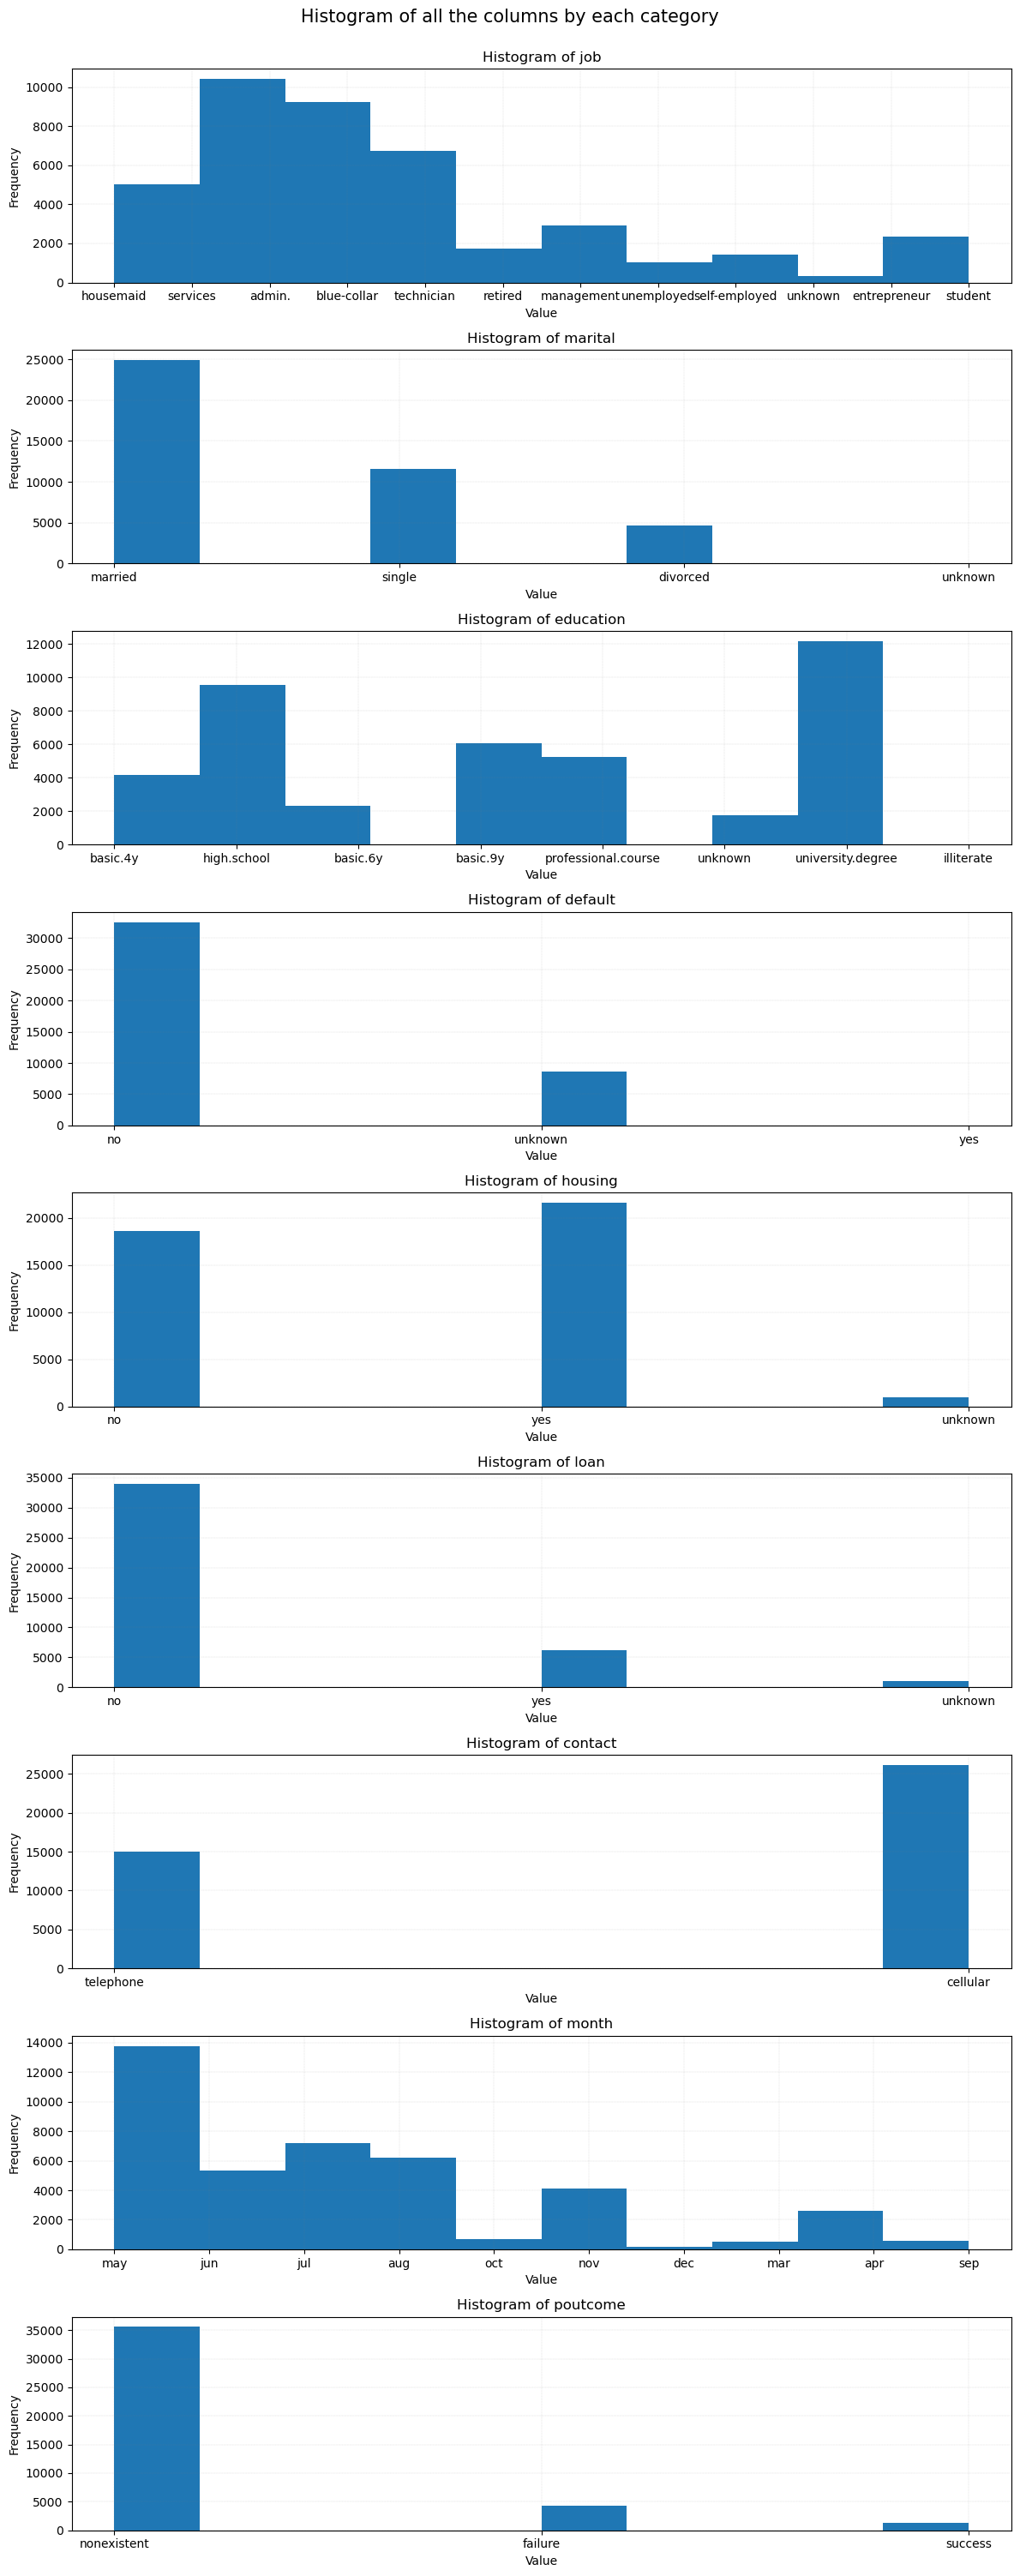

In [21]:
# Let's take a closer look at the categorical values

fig, axes = plt.subplots(nrows=9, ncols=1, figsize=(12, 30)) 

for i, col in enumerate(cat_cols):
    axes[i].hist(df_revised[col])
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True, color = "grey", linewidth = "0.1", linestyle = "-.")
    
plt.suptitle('Histogram of all the columns by each category',fontsize=(15),y=1)
plt.tight_layout()
plt.show()

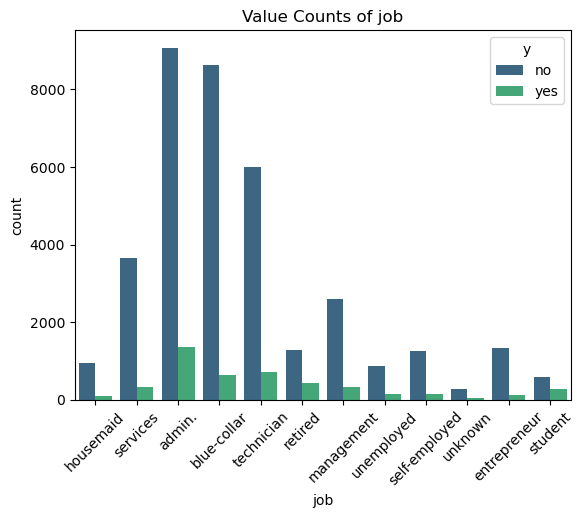

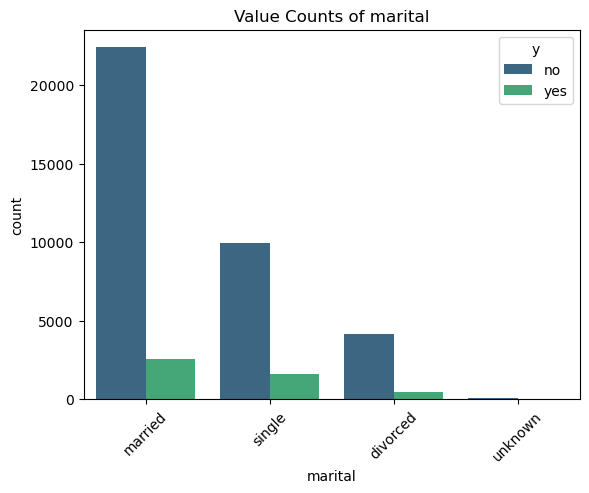

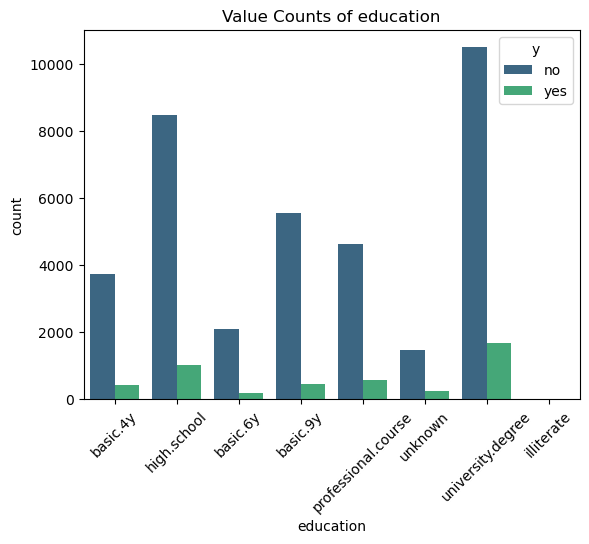

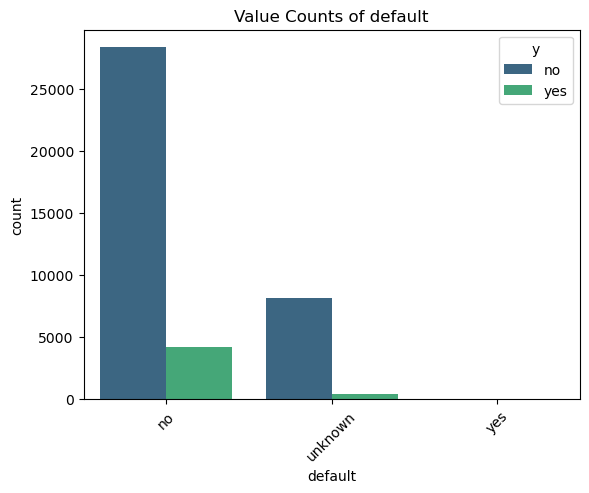

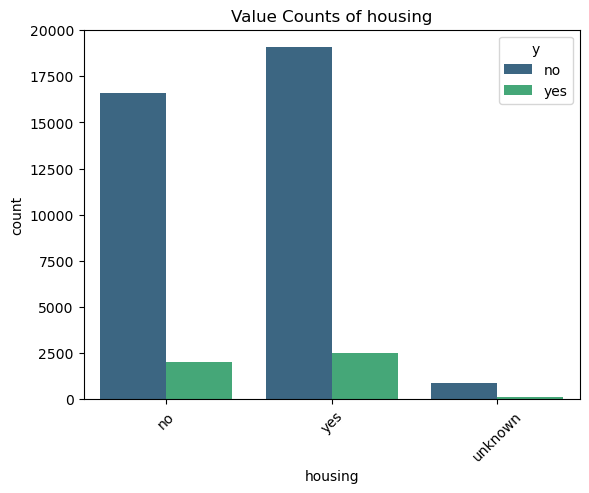

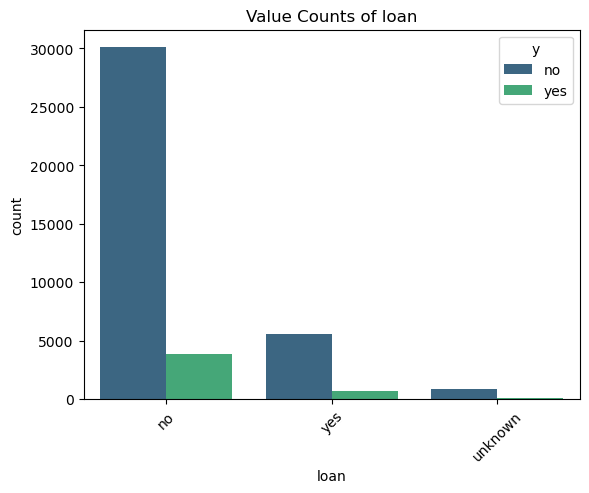

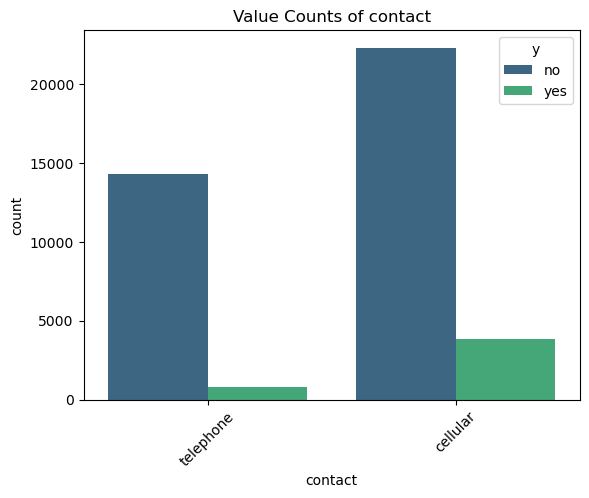

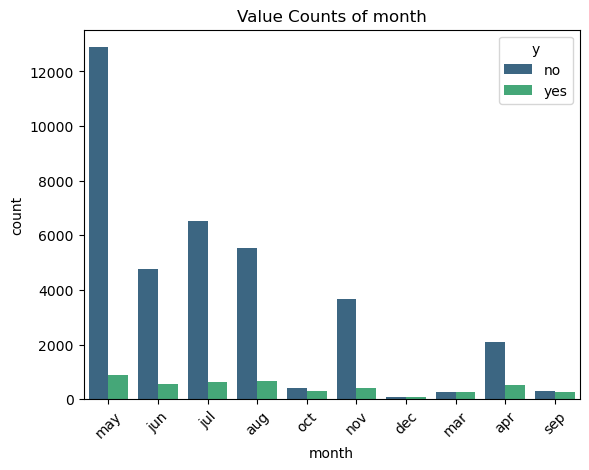

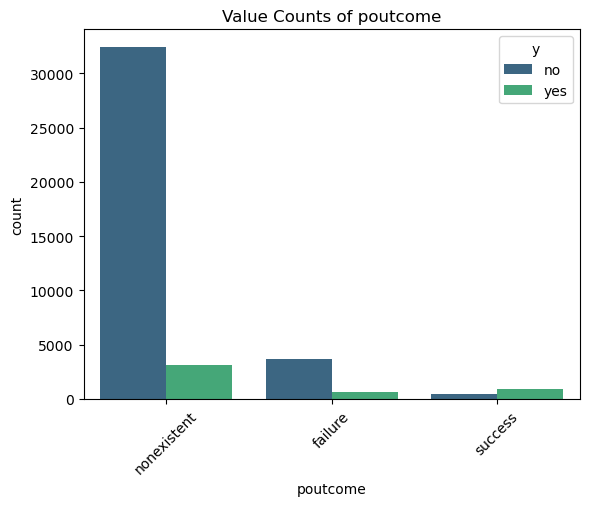

In [22]:
# Let's explore the graph comparing the values by target value
for col in cat_cols:
  sns.countplot(x=col, data=df_revised, hue='y', palette='viridis')
  plt.title(f'Value Counts of {col}')
  plt.xticks(rotation=45)
  plt.show()

In [23]:
# Identify all the numerical columns 
num_cols = df_revised.select_dtypes(exclude=['object']).columns.tolist()
num_cols

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp_var_rate',
 'cons_price_idx',
 'cons_conf_idx',
 'euribor3m']

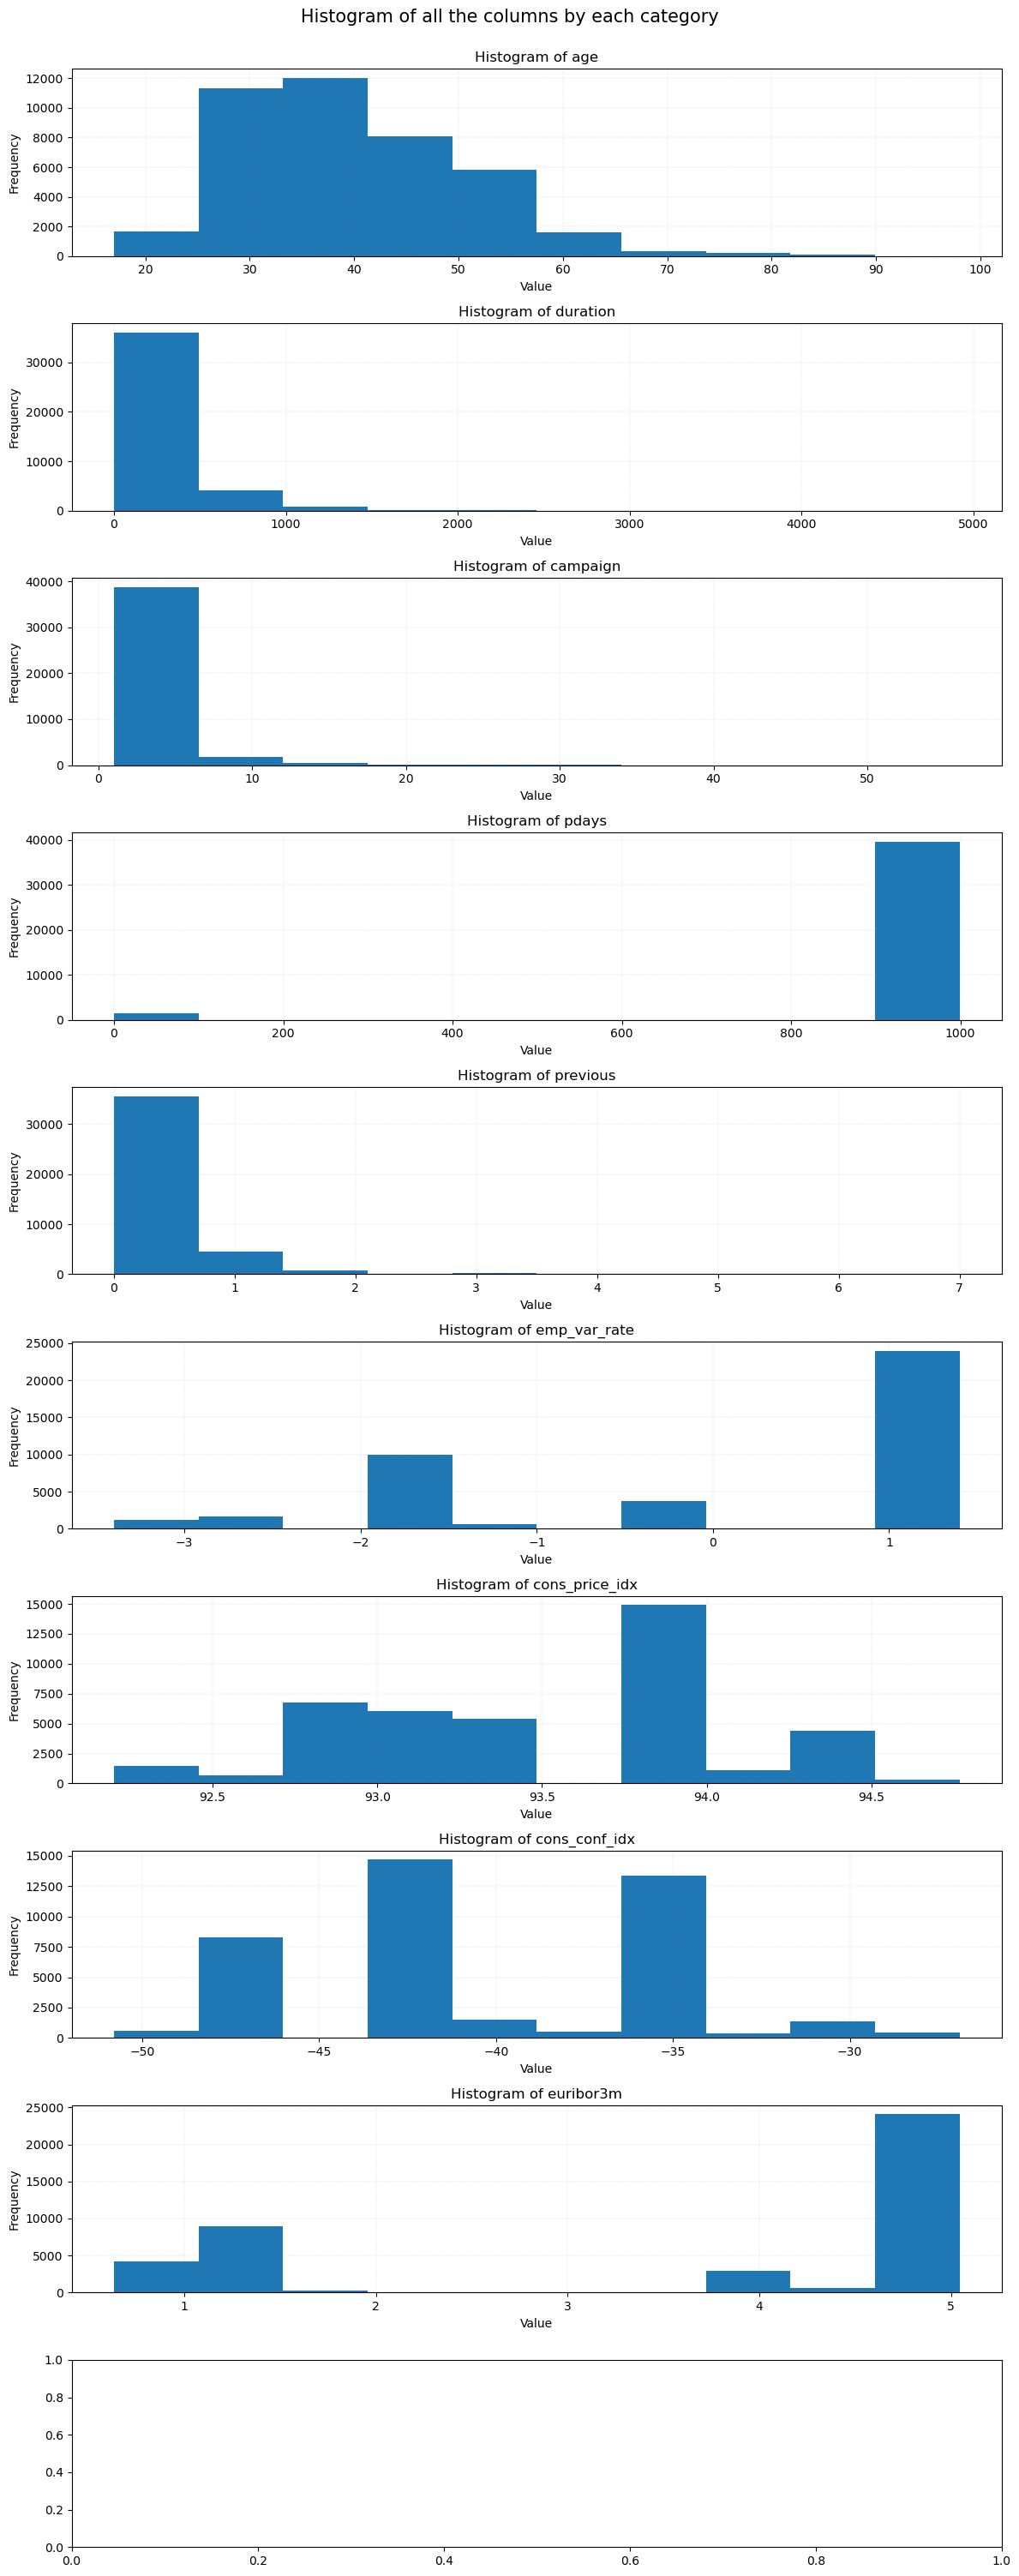

In [24]:
# Let's take a closer look at the categorical values

fig, axes = plt.subplots(nrows=10, ncols=1, figsize=(12, 30)) 

for i, col in enumerate(num_cols):
    axes[i].hist(df_revised[col])
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True, color = "grey", linewidth = "0.1", linestyle = "-.")
    
plt.suptitle('Histogram of all the columns by each category',fontsize=(15),y=1)
plt.tight_layout()
plt.show()

In [25]:
# Let's look at pdays value. The outlier looks very odd
df_revised.pdays.unique()

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20])

In [26]:
# Let's find out the count of each unique value. We will see that value 999 occurs very frequently. 
# Per data definition, 999 indicates client was not contacted
df_revised.groupby('pdays')['pdays'].count()

pdays
0         15
1         26
2         61
3        439
4        118
5         46
6        412
7         60
8         18
9         64
10        52
11        28
12        58
13        36
14        20
15        24
16        11
17         8
18         7
19         3
20         1
21         2
22         3
25         1
26         1
27         1
999    39673
Name: pdays, dtype: int64

In [27]:
# Let's look at the correlation between the columns for the numeric attributes
df_revised.corr(numeric_only=True)

age  duration  campaign     pdays  previous  \
age             1.000000 -0.000866  0.004594 -0.034369  0.024365   
duration       -0.000866  1.000000 -0.071699 -0.047577  0.020640   
campaign        0.004594 -0.071699  1.000000  0.052584 -0.079141   
pdays          -0.034369 -0.047577  0.052584  1.000000 -0.587514   
previous        0.024365  0.020640 -0.079141 -0.587514  1.000000   
emp_var_rate   -0.000371 -0.027968  0.150754  0.271004 -0.420489   
cons_price_idx  0.000857  0.005312  0.127836  0.078889 -0.203130   
cons_conf_idx   0.129372 -0.008173 -0.013733 -0.091342 -0.050936   
euribor3m       0.010767 -0.032897  0.135133  0.296899 -0.454494   

                emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  
age                -0.000371        0.000857       0.129372   0.010767  
duration           -0.027968        0.005312      -0.008173  -0.032897  
campaign            0.150754        0.127836      -0.013733   0.135133  
pdays               0.271004        0.078889      -0.091342   0.296899  
previous           -0.420489       -0.203130      -0.050936  -0.454494  
emp_var_rate        1.000000        0.775334       0.196041   0.972245  
cons_price_idx      0.775334        1.000000       0.058986   0.688230  
cons_conf_idx       0.196041        0.058986       1.000000   0.277686  
euribor3m           0.972245        0.688230       0.277686   1.000000

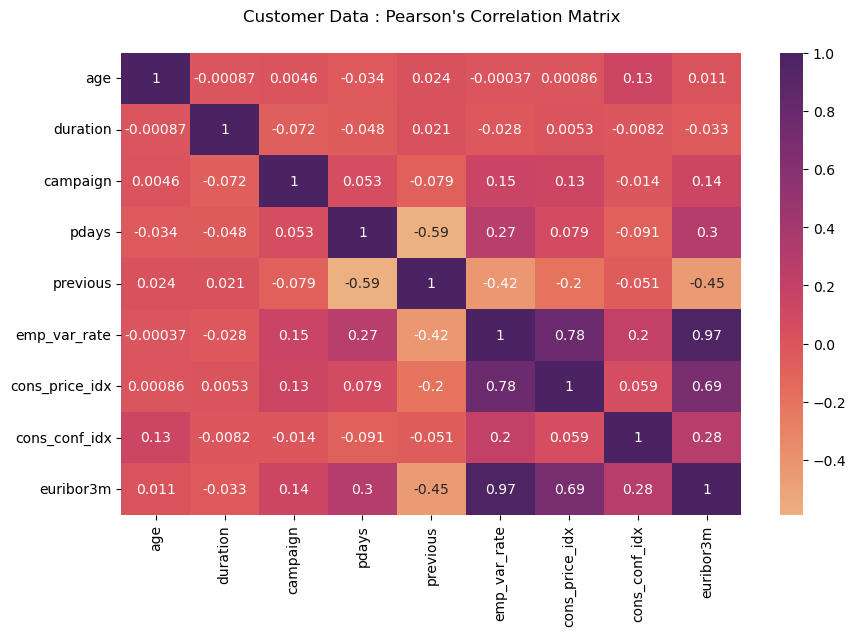

In [28]:
# Let's create a HeatMap to correlate all the numerical datasets

plt.figure(figsize=(10,6))
corr = df_revised[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='flare')
plt.title('Customer Data : Pearson\'s Correlation Matrix',y=1.05)
plt.show()

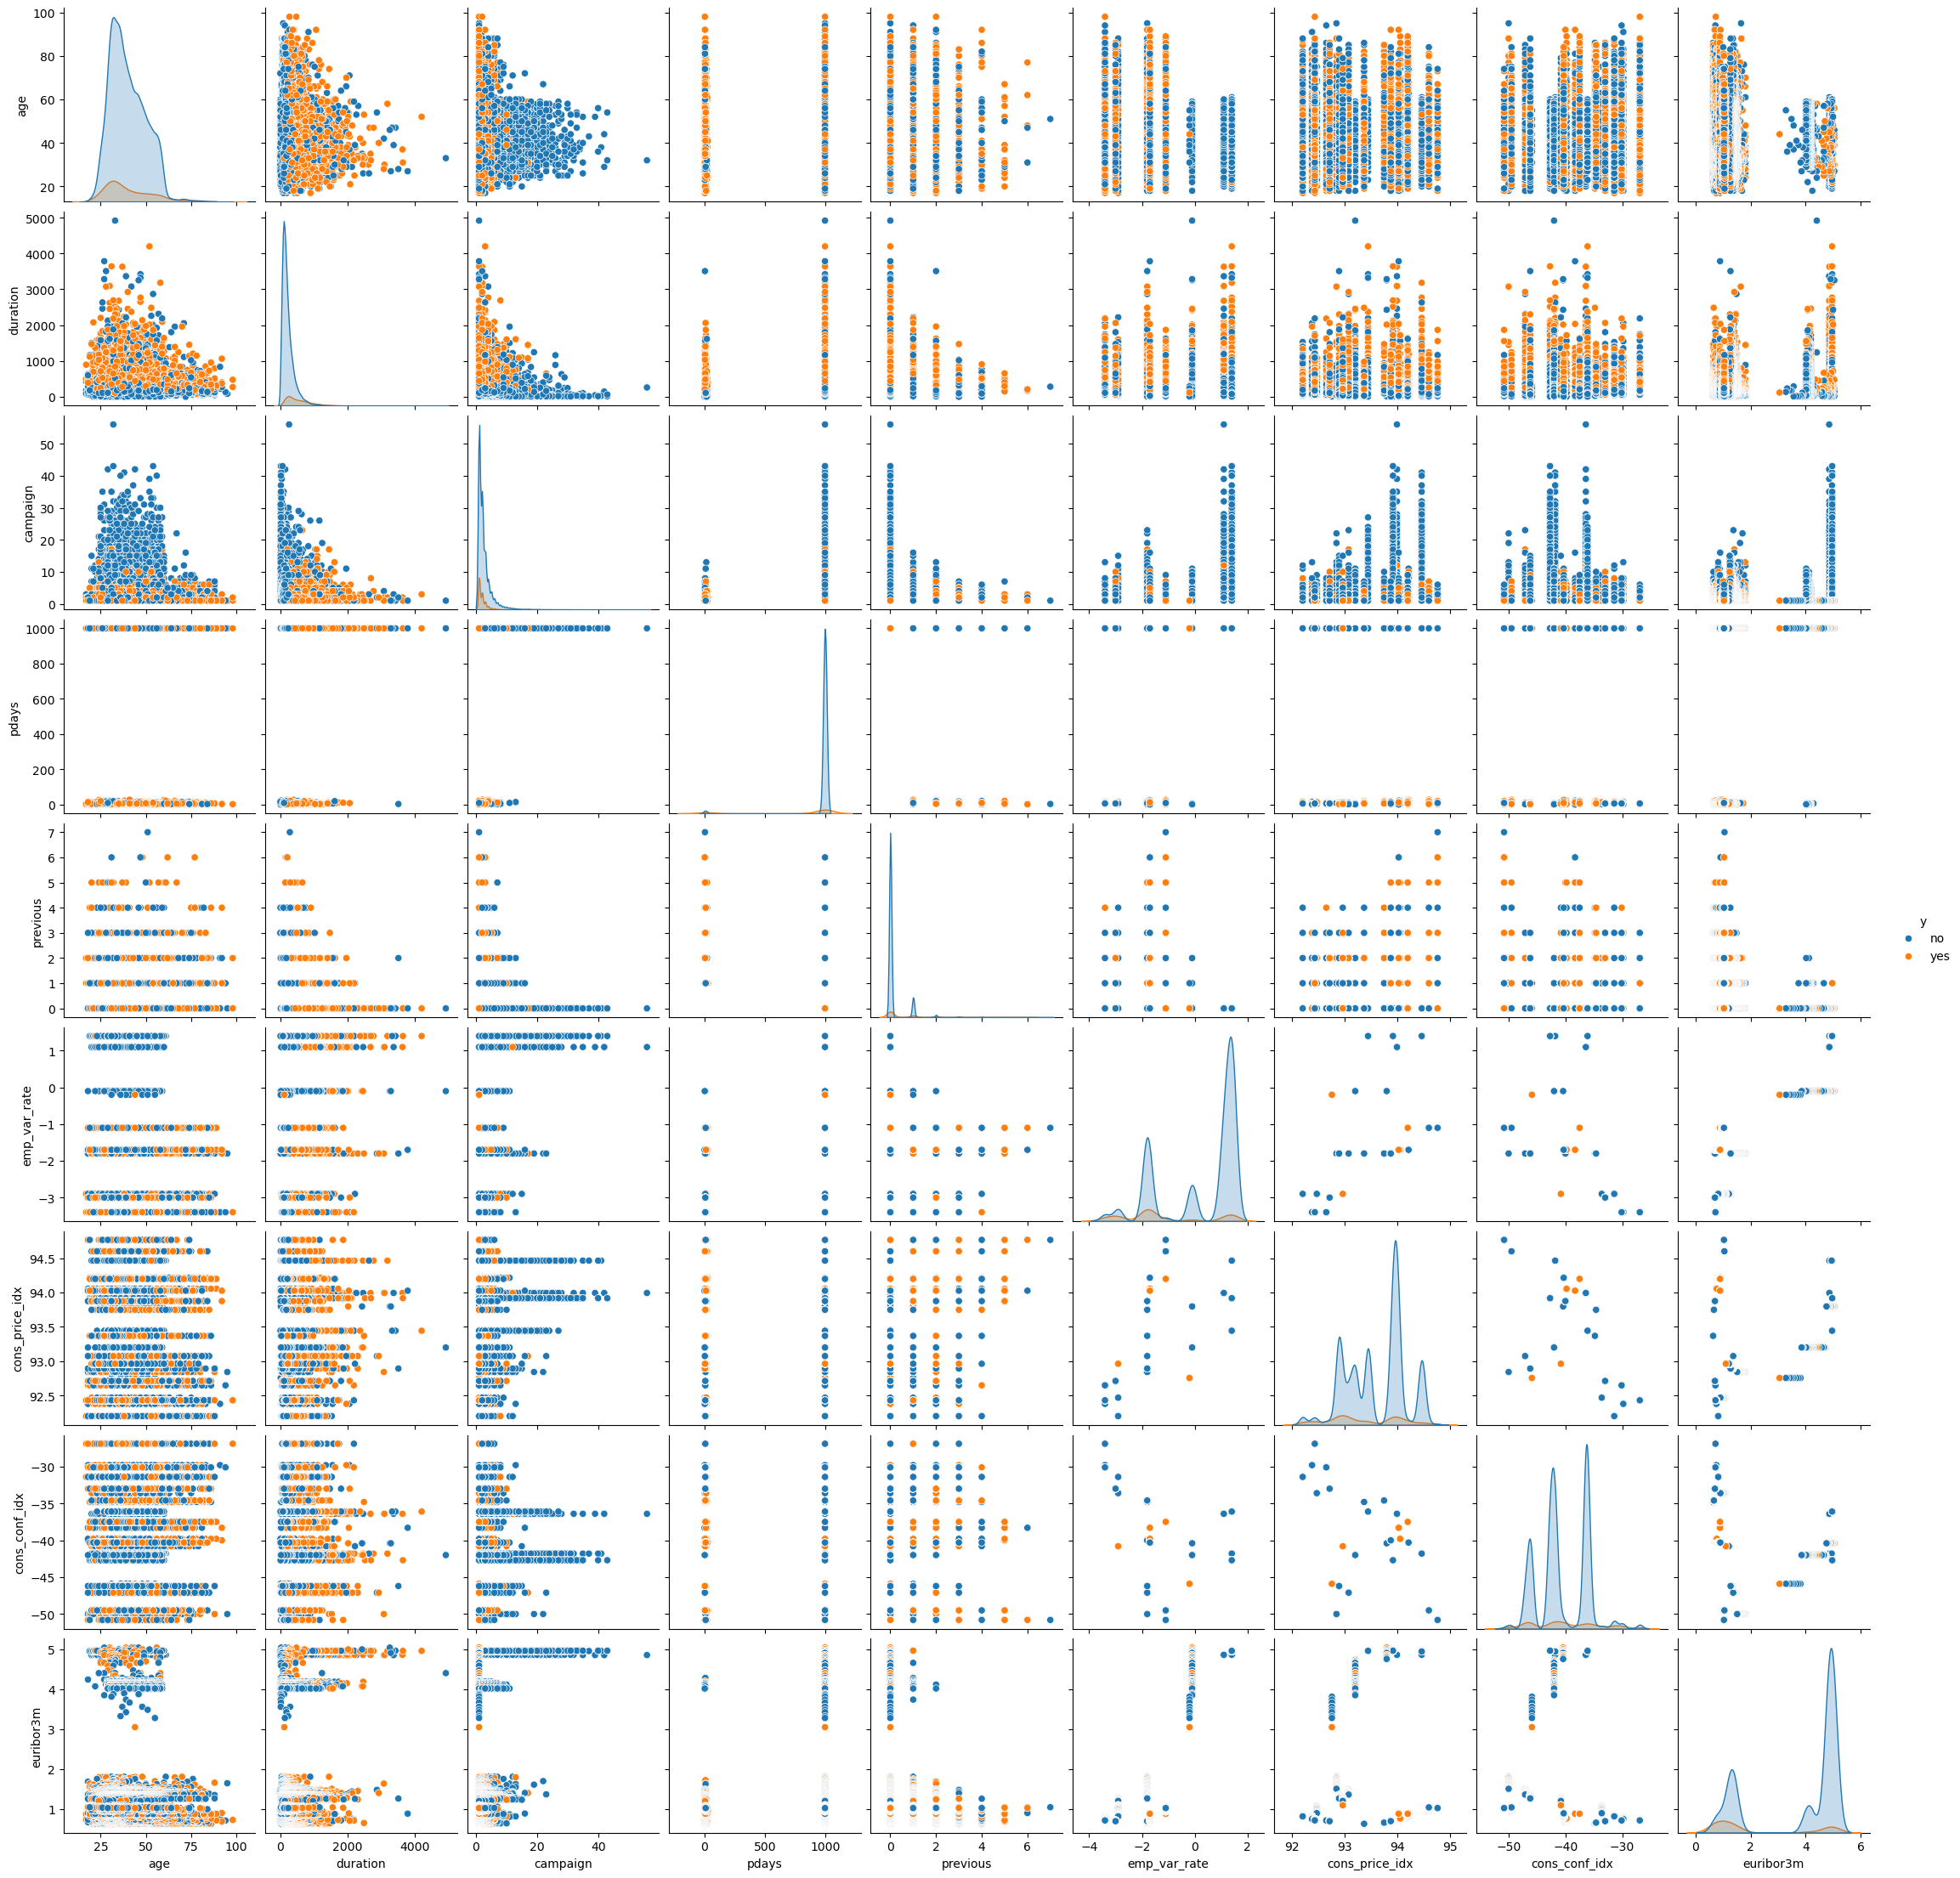

In [29]:
sns.pairplot(df_revised, hue='y')
plt.show()

In [30]:
# Let's find out how the target variable is distributed

grouped = df_revised.groupby('y')['y'].count()
grouped

y
no     36548
yes     4640
Name: y, dtype: int64

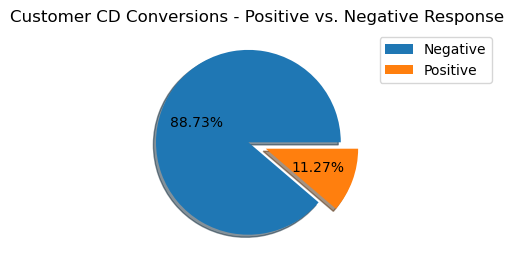

In [31]:
# Let's look at Datast and plot the % of customers that subscribed to the CD promotion

ax = grouped.plot(kind='pie', figsize=(10,3), 
                  grid=False, ylabel='',
                  labels = ['Negative', 'Positive'],
                  shadow=True, explode=[0.1, 0.1],
                  legend=True, labeldistance=None, 
                  autopct='%1.2f%%')
ax.legend(bbox_to_anchor=(1, 1),loc='upper left')
plt.title('Customer CD Conversions - Positive vs. Negative Response')
plt.show()

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [32]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split 

# We know that some of the categorical data elements can be converted to numerical
# Let's use Label Encoder to convert the data

df_revised['job']       = LabelEncoder().fit_transform(df_revised['job'])
df_revised['marital']   = LabelEncoder().fit_transform(df_revised['marital'])
df_revised['education'] = LabelEncoder().fit_transform(df_revised['education'])
df_revised['default']   = LabelEncoder().fit_transform(df_revised['default'])
df_revised['housing']   = LabelEncoder().fit_transform(df_revised['housing'])
df_revised['loan']      = LabelEncoder().fit_transform(df_revised['loan'])
df_revised['contact']   = LabelEncoder().fit_transform(df_revised['contact'])
df_revised['month']     = LabelEncoder().fit_transform(df_revised['month'])
df_revised['poutcome']  = LabelEncoder().fit_transform(df_revised['poutcome'])
df_revised['y']         = LabelEncoder().fit_transform(df_revised['y'])

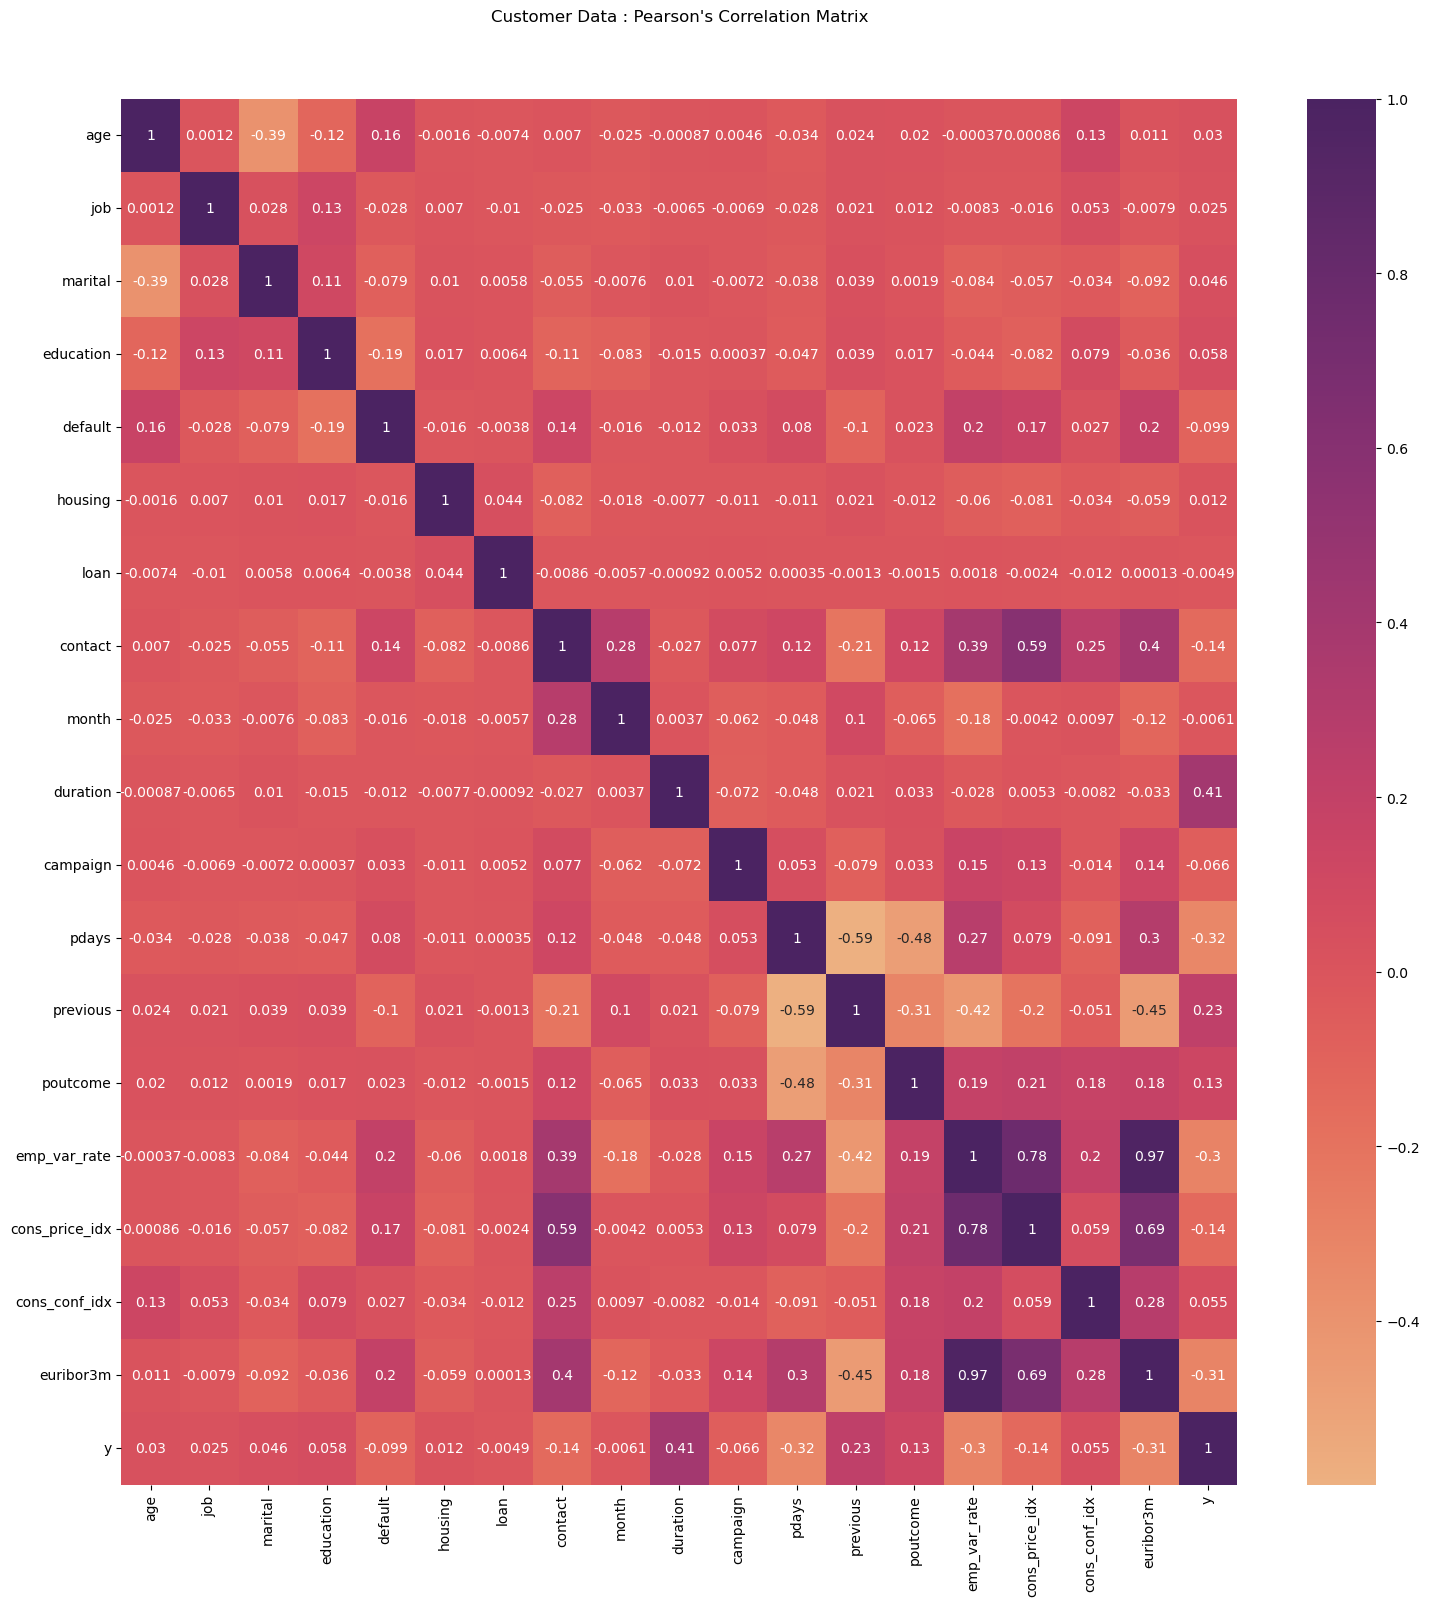

In [33]:
# Let's create a HeatMap to correlate all the numerical datasets after Label Encoding

# Identify all the numerical columns 
num_cols = df_revised.select_dtypes(exclude=['object']).columns.tolist()
num_cols

plt.figure(figsize=(18,18))
corr = df_revised[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='flare')
plt.title('Customer Data : Pearson\'s Correlation Matrix',y=1.05)
plt.show()

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [34]:
X = df_revised.drop('y', axis = 1)
y = df_revised['y']

In [35]:
# Let's split the data into training and test sets. We will use 80% of the data for training and 20% for test.
# stratify argument ensures that the same proportion of examples is preserved across each class of training and testing data.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42,stratify=y)

In [36]:
X_train.shape, X_test.shape

((32950, 18), (8238, 18))

In [37]:
y_train.shape, y_test.shape

((32950,), (8238,))

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [38]:
from sklearn.dummy import DummyClassifier

from sklearn.metrics import mean_squared_error, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc

from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay, classification_report

import warnings
warnings.filterwarnings("ignore")

In [39]:
# Create a Baseline Model using the DummyClassifier

# A baseline model for classification is a basic model that serves as a reference point for evaluating 
# other models' performance and guiding the development of more complex models

baseline_model = DummyClassifier(strategy="most_frequent")
baseline_model.fit(X_train, y_train)

# Make predictions
y_pred = baseline_model.predict(X_test)

# Evaluate performance
precision = precision_score(y_test, y_pred)
recall    = recall_score(y_test, y_pred)
accuracy  = accuracy_score(y_test, y_pred)
fscore    = f1_score(y_test, y_pred)

print('Baseline Model using Dummy Classifier')
print(f'Precision is: {precision:.2f}')
print(f'Recall    is: {recall:.2f}')
print(f'F1 Score  is: {fscore:.2f}')
print(f'Accuracy  is: {accuracy:.2f}')

Baseline Model using Dummy Classifier
Precision is: 0.00
Recall    is: 0.00
F1 Score  is: 0.00
Accuracy  is: 0.89


In [40]:
# Let's evaluate the Confusion Matrix and print the results
conf_matrix = confusion_matrix(y_test, y_pred)

print(conf_matrix)

y_pred_1d = y_pred.ravel()
y_test_1d = y_test.values.ravel()
pd.crosstab(y_test_1d, y_pred_1d, rownames=['True'], colnames=['Predicted'], margins=True)

[[7310    0]
 [ 928    0]]


Predicted     0   All
True                 
0          7310  7310
1           928   928
All        8238  8238

In [41]:
# Let us cross check the values against y_test, 
# we can see that the prediction from the Baseline Model (DummyClassifer) is the same as the groupby counts of y_test values

pd.DataFrame(y_test.groupby(y_test).count())

y
y      
0  7310
1   928

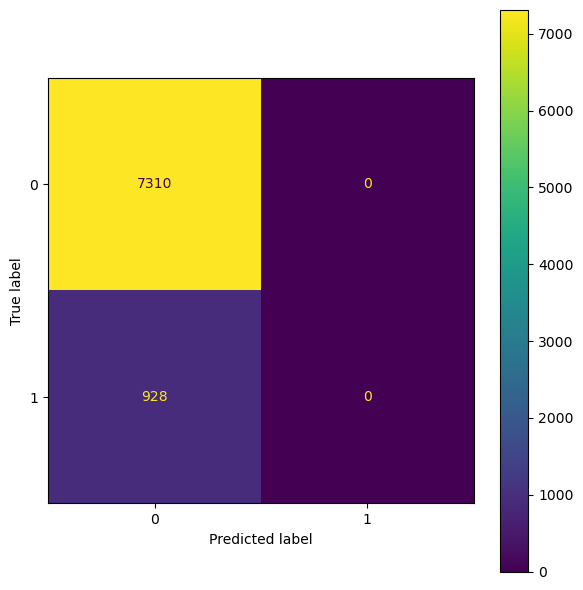

In [42]:
# Let's print the confusion matrix 

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(6, 6)

# Confusion Matrix
disp1 = ConfusionMatrixDisplay(conf_matrix)
disp1.plot(ax=ax)
plt.tight_layout()
plt.show()

In [43]:
# ROC Curve
y_score_yes = baseline_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_score_yes, pos_label=1)

roc_auc_value = auc(fpr, tpr)
print (f'The Accuracy Score : AUC is {roc_auc_value:.2f}')

roc_auc_val = roc_auc_score(y_test, y_score_yes)

print (f'The ROC Accuracy Score : ROC-AUC is {roc_auc_val:.2f}')

The Accuracy Score : AUC is 0.50
The ROC Accuracy Score : ROC-AUC is 0.50


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
# Create a basic Logistic Regression Model
lr_model = LogisticRegression()

# Train the basic Logistic Regression Model
lr_model.fit(X_train, y_train)

# Make the Prediction using the basic Logistic Regression Model on the X_test data
lr_pred = lr_model.predict(X_test)

### Problem 9: Score the Model

What is the accuracy of your model?

In [46]:
# Evaluate the performance of the model
precision = precision_score(y_test, lr_pred)
recall    = recall_score(y_test, lr_pred)
accuracy  = accuracy_score(y_test, lr_pred)
fscore    = f1_score(y_test, lr_pred)

print('Logistic Regression basic model')
print(f'Precision is: {precision:.2f}')
print(f'Recall    is: {recall:.2f}')
print(f'F1 Score  is: {fscore:.2f}')
print(f'Accuracy  is: {accuracy:.2f}')

Logistic Regression basic model
Precision is: 0.66
Recall    is: 0.37
F1 Score  is: 0.47
Accuracy  is: 0.91


**Observation**:  
The baseline model has an accuracy score of 0.89  
The Logistic Regression basic model has an accuracy score of 0.91  
This shows that Logistic Regression basic model is able to out perform the baseline model

In [47]:
# Let's evaluate the Confusion Matrix and print the results
conf_matrix = confusion_matrix(y_test, lr_pred)

print(conf_matrix)

y_pred_1d = lr_pred.ravel()
y_test_1d = y_test.values.ravel()
pd.crosstab(y_test_1d, y_pred_1d, rownames=['True'], colnames=['Predicted'], margins=True)

[[7136  174]
 [ 587  341]]


Predicted     0    1   All
True                      
0          7136  174  7310
1           587  341   928
All        7723  515  8238

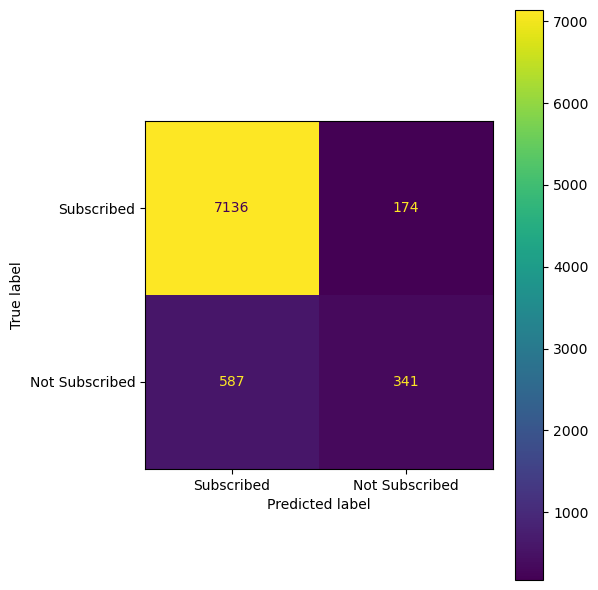

In [48]:
# Let's print the confusion matrix 

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(6, 6)

# Confusion Matrix
disp1 = ConfusionMatrixDisplay(conf_matrix,display_labels=['Subscribed', 'Not Subscribed'])
disp1.plot(ax=ax)
plt.tight_layout()
plt.show()

In [49]:
# ROC Curve
y_score_yes = lr_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_score_yes, pos_label=1)

roc_auc_value = auc(fpr, tpr)
print (f'The Accuracy Score : AUC is {roc_auc_value:.2f}')

roc_auc_val = roc_auc_score(y_test, y_score_yes)

print (f'The ROC Accuracy Score : ROC-AUC is {roc_auc_val:.2f}')

The Accuracy Score : AUC is 0.93
The ROC Accuracy Score : ROC-AUC is 0.93


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [50]:
# Let's Import all the Models that need to be compared

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

import graphviz


In [51]:
# Initialize all the models requested in this exercise
# Models are: Logistic Regression, Decision Tree Classifer, K Nearest Neighbor Classifer, and Support Vector Machines
model_dict = {
    'Dummy Classifier': DummyClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'K Nearest Neighbor Classifier': KNeighborsClassifier(),
    'Support Vector Machines': SVC(probability=True)
}

In [52]:
# Before we get started, let's create a function to do some routine tasks

# Function to Evaluate the performance of the model and Print the Results
def print_performance(pred_val, model_name):
    
    precision = precision_score(y_test, pred_val)
    recall    = recall_score(y_test, pred_val)
    accuracy  = accuracy_score(y_test, pred_val)
    fscore    = f1_score(y_test, pred_val)

    print(f'Performance Report for {model_name}\n')
    print(f'Precision is: {precision:.2f}')
    print(f'Recall    is: {recall:.2f}')
    print(f'F1 Score  is: {fscore:.2f}')
    print(f'Accuracy  is: {accuracy:.2f}')

    # Classification report
    print('\nClassification Report:')
    print(classification_report(y_test, pred_val))
    return precision, recall, accuracy, fscore

In [53]:
# Function to Evaluate the Confusion Matrix and Print the Results
def print_confusion_matrix(pred_val, model_name):
    
    conf_matrix = confusion_matrix(y_test, pred_val)

    TN = conf_matrix[0, 0]
    FP = conf_matrix[0, 1]
    FN = conf_matrix[1, 0]
    TP = conf_matrix[1, 1]

    print(f'Results for {model_name}\n')
    print('Confusion Matrix:\n')
    print(conf_matrix)
    print()

    print (f'True Negative  : {TN:4}')
    print (f'False Positive : {FP:4}')
    print (f'False Negative : {FN:4}')
    print (f'True Positive  : {TP:4}')
    print()
    
    y_pred_1d = pred_val.ravel()
    y_test_1d = y_test.values.ravel()
    ctab = pd.crosstab(y_test_1d, y_pred_1d, rownames=['True'], colnames=['Predicted'], margins=True)

    print(ctab)

    # Let's print the confusion matrix 

    fig, ax = plt.subplots(1, 1)
    fig.set_size_inches(10, 6)

    # Confusion Matrix
    disp1 = ConfusionMatrixDisplay(conf_matrix, display_labels=['Not Subscribed', 'Subscribed'])
    disp1.plot(ax=ax, cmap='viridis')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.tight_layout()
    plt.show()
    return conf_matrix, TN, FP, FN, TP

In [54]:
# Function to calculate the ROC Accuracy Score and Print the Results

def print_roc_scores(y_prob,model_name):
    print(f'Model Name: {model_name}\n')
    
    fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label=1)

    roc_auc_val = roc_auc_score(y_test, y_prob)

    print (f'The ROC Accuracy Score : ROC-AUC is {roc_auc_val:.2f}\n')

    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_val:.2f})')
    plt.plot([0, 1], [0, 1], 'k--',color='red')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title(f'{model_name} : Receiver Operating Characteristic (ROC) Curve',y=1.03)
    plt.legend(loc='lower right')
    plt.show()
    return roc_auc_val, fpr, tpr

In [55]:
# Function to create the Evaluate the Model (Train the model /Fit the model, then perform prediction using Predict)
# We will also calculate the time to train the model and print all the key values using the print functions we defined

# Use a flag for Optimized to check if we are doing basic model review or optimization model reviews

def evaluate_model(model, model_name, optimized):

    # Train the Model and also capture the training time
    tic=timeit.default_timer()
    model.fit(X_train, y_train)
    toc=timeit.default_timer()
    tsec = toc - tic #elapsed time in seconds
    
    print (f'Results for {model_name}\n')
    print (f'Training Time     : {tsec:.4f} seconds\n')

    # Calculate the Training and Test Accuracy
    train_accuracy = model.score(X_train, y_train)
    test_accuracy  = model.score(X_test, y_test)
    
    print (f'Training Accuracy : {train_accuracy:.2f}\n')
    print (f'Test     Accuracy : {test_accuracy:.2f}\n')

    #For Optimization request, use best_estimator to pick the predict values and predict probability
    if optimized:
        best_model = model.best_estimator_
        pred_val = best_model.predict(X_test)
        y_prob  = best_model.predict_proba(X_test)[:, 1]
    
    # Predict the results for the model
    pred_val = model.predict(X_test)

    # Calculate the Prediction Probability for each test set
    y_prob  = model.predict_proba(X_test)[:, 1]

    # Calculate and Print the Performance of the Model
    precision, recall, accuracy, fscore = print_performance(pred_val, model_name)

    # Compute and Print the Confusion Matrix
    conf_matrix, tn, fp, fn, tp = print_confusion_matrix(pred_val, model_name)

    # Compute and Print the ROC Curve
    auc_roc_val, fpr, tpr = print_roc_scores(y_prob, model_name)

    return [f'{tsec:.4f}', f'{train_accuracy:.2f}', f'{test_accuracy:.2f}', 
            f'{precision:.2f}', f'{recall:.2f}', f'{accuracy:.2f}', f'{fscore:.2f}', f'{auc_roc_val:.2f}', 
            tn, fp, fn, tp, fpr, tpr, conf_matrix]

Results for Dummy Classifier

Training Time     : 0.0018 seconds

Training Accuracy : 0.89

Test     Accuracy : 0.89

Performance Report for Dummy Classifier

Precision is: 0.00
Recall    is: 0.00
F1 Score  is: 0.00
Accuracy  is: 0.89

Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      7310
           1       0.00      0.00      0.00       928

    accuracy                           0.89      8238
   macro avg       0.44      0.50      0.47      8238
weighted avg       0.79      0.89      0.83      8238

Results for Dummy Classifier

Confusion Matrix:

[[7310    0]
 [ 928    0]]

True Negative  : 7310
False Positive :    0
False Negative :  928
True Positive  :    0

Predicted     0   All
True                 
0          7310  7310
1           928   928
All        8238  8238


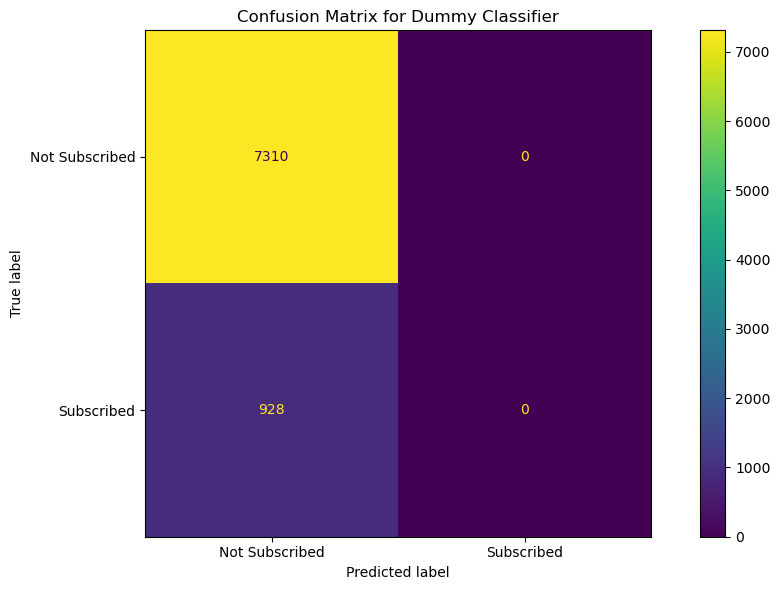

Model Name: Dummy Classifier

The ROC Accuracy Score : ROC-AUC is 0.50



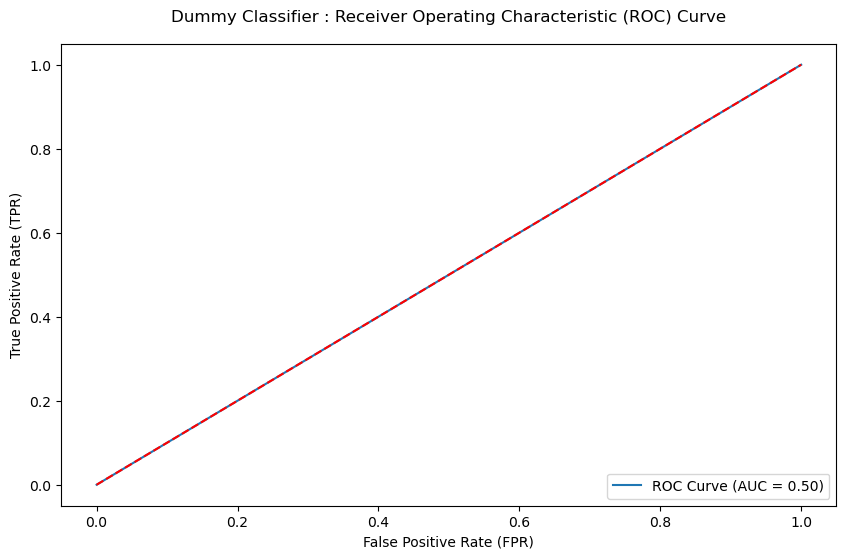



Results for Logistic Regression

Training Time     : 0.1521 seconds

Training Accuracy : 0.91

Test     Accuracy : 0.91

Performance Report for Logistic Regression

Precision is: 0.66
Recall    is: 0.37
F1 Score  is: 0.47
Accuracy  is: 0.91

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7310
           1       0.66      0.37      0.47       928

    accuracy                           0.91      8238
   macro avg       0.79      0.67      0.71      8238
weighted avg       0.89      0.91      0.90      8238

Results for Logistic Regression

Confusion Matrix:

[[7136  174]
 [ 587  341]]

True Negative  : 7136
False Positive :  174
False Negative :  587
True Positive  :  341

Predicted     0    1   All
True                      
0          7136  174  7310
1           587  341   928
All        7723  515  8238


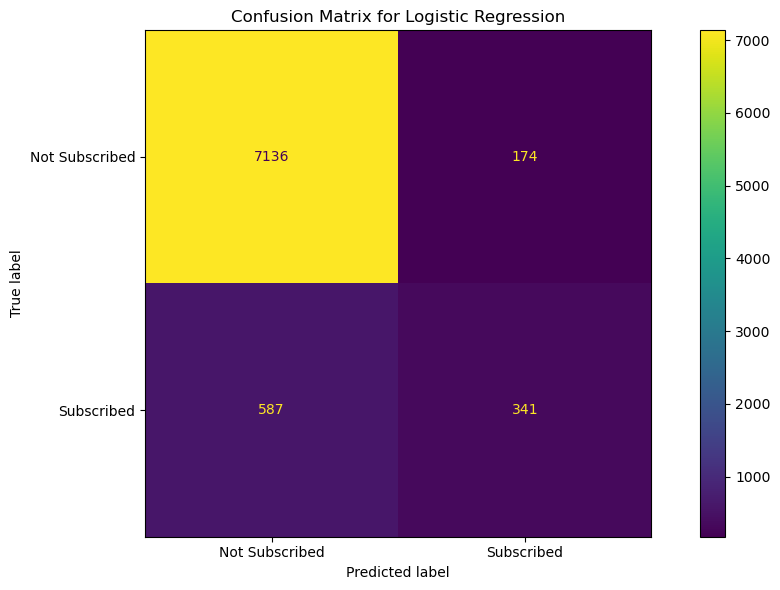

Model Name: Logistic Regression

The ROC Accuracy Score : ROC-AUC is 0.93



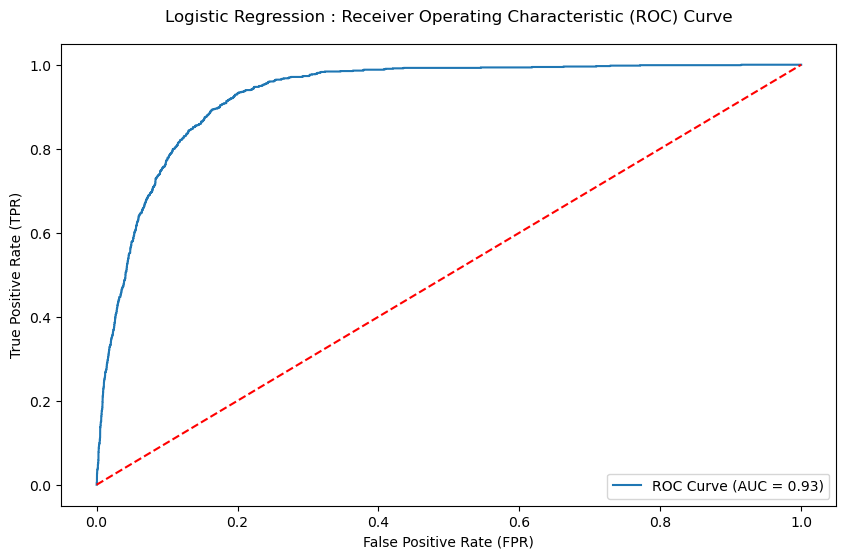



Results for Decision Tree Classifier

Training Time     : 0.1136 seconds

Training Accuracy : 1.00

Test     Accuracy : 0.89

Performance Report for Decision Tree Classifier

Precision is: 0.52
Recall    is: 0.53
F1 Score  is: 0.52
Accuracy  is: 0.89

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7310
           1       0.52      0.53      0.52       928

    accuracy                           0.89      8238
   macro avg       0.73      0.73      0.73      8238
weighted avg       0.89      0.89      0.89      8238

Results for Decision Tree Classifier

Confusion Matrix:

[[6861  449]
 [ 440  488]]

True Negative  : 6861
False Positive :  449
False Negative :  440
True Positive  :  488

Predicted     0    1   All
True                      
0          6861  449  7310
1           440  488   928
All        7301  937  8238


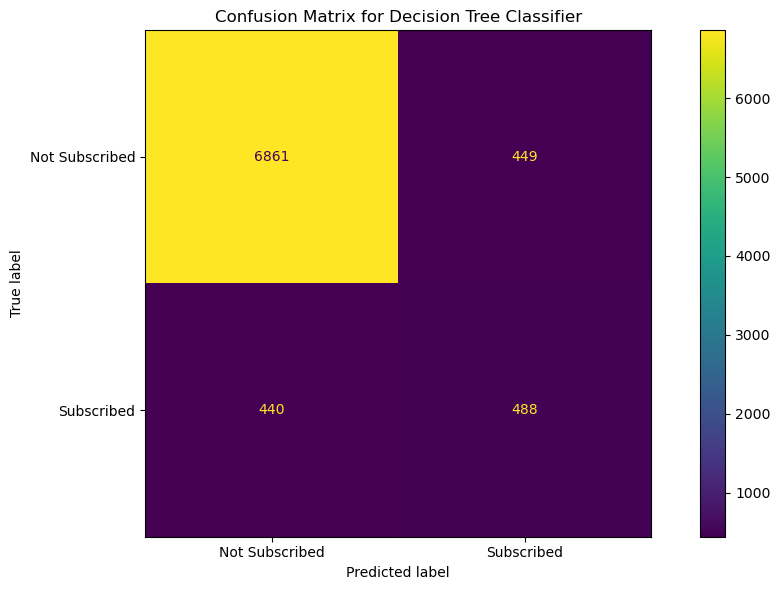

Model Name: Decision Tree Classifier

The ROC Accuracy Score : ROC-AUC is 0.73



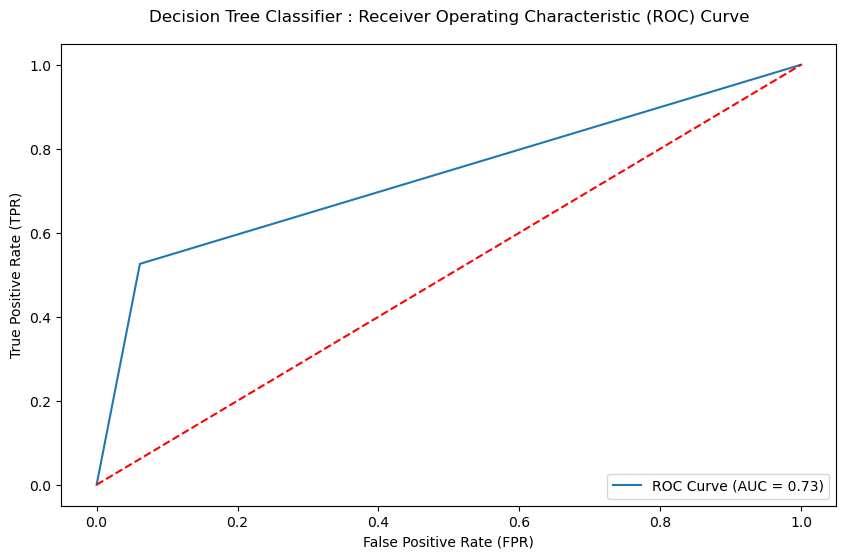



Results for K Nearest Neighbor Classifier

Training Time     : 0.0027 seconds

Training Accuracy : 0.93

Test     Accuracy : 0.90

Performance Report for K Nearest Neighbor Classifier

Precision is: 0.60
Recall    is: 0.40
F1 Score  is: 0.48
Accuracy  is: 0.90

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7310
           1       0.60      0.40      0.48       928

    accuracy                           0.90      8238
   macro avg       0.76      0.68      0.71      8238
weighted avg       0.89      0.90      0.89      8238

Results for K Nearest Neighbor Classifier

Confusion Matrix:

[[7057  253]
 [ 553  375]]

True Negative  : 7057
False Positive :  253
False Negative :  553
True Positive  :  375

Predicted     0    1   All
True                      
0          7057  253  7310
1           553  375   928
All        7610  628  8238


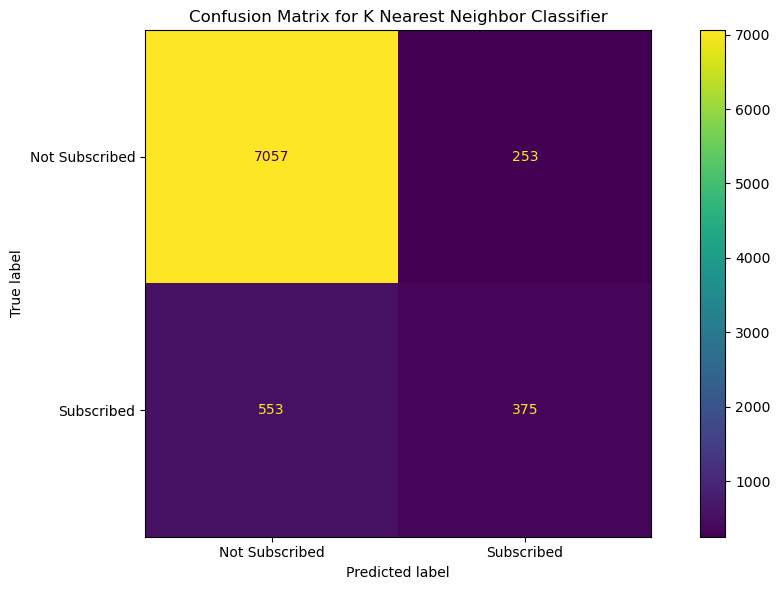

Model Name: K Nearest Neighbor Classifier

The ROC Accuracy Score : ROC-AUC is 0.86



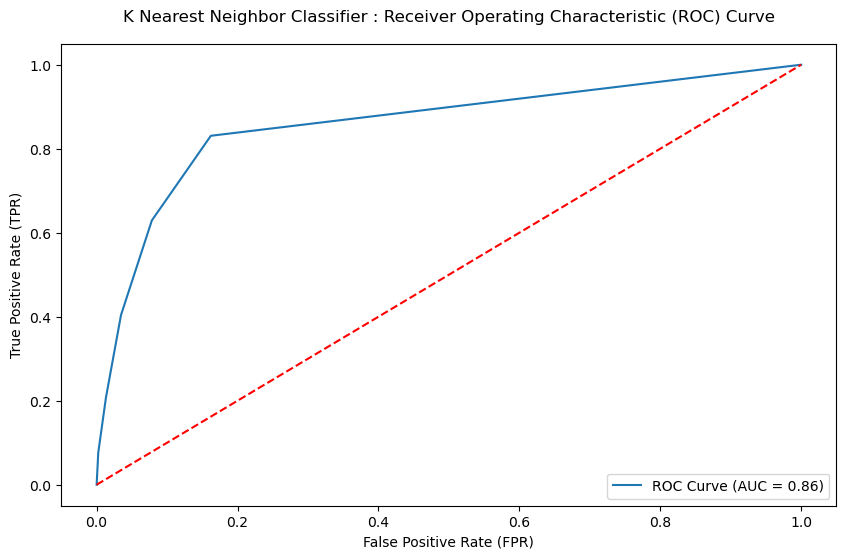



Results for Support Vector Machines

Training Time     : 30.8420 seconds

Training Accuracy : 0.90

Test     Accuracy : 0.91

Performance Report for Support Vector Machines

Precision is: 0.70
Recall    is: 0.30
F1 Score  is: 0.42
Accuracy  is: 0.91

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7310
           1       0.70      0.30      0.42       928

    accuracy                           0.91      8238
   macro avg       0.81      0.64      0.69      8238
weighted avg       0.89      0.91      0.89      8238

Results for Support Vector Machines

Confusion Matrix:

[[7186  124]
 [ 645  283]]

True Negative  : 7186
False Positive :  124
False Negative :  645
True Positive  :  283

Predicted     0    1   All
True                      
0          7186  124  7310
1           645  283   928
All        7831  407  8238


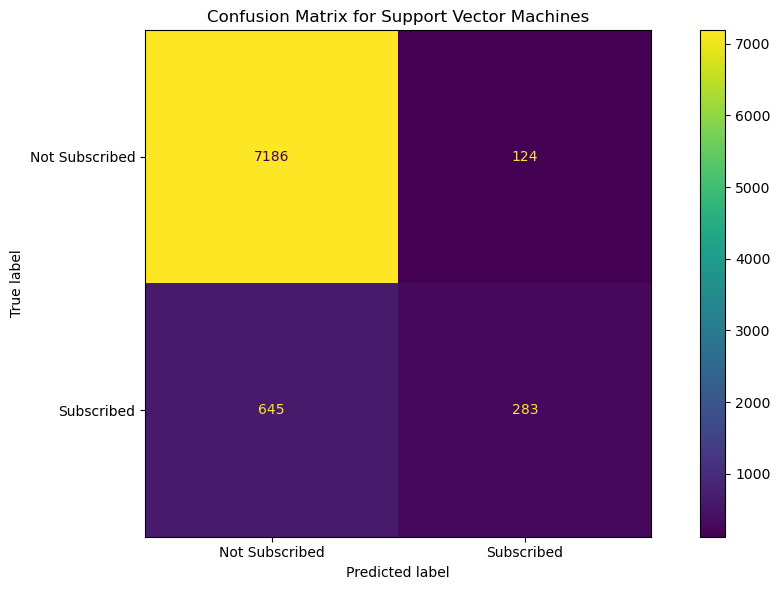

Model Name: Support Vector Machines

The ROC Accuracy Score : ROC-AUC is 0.87



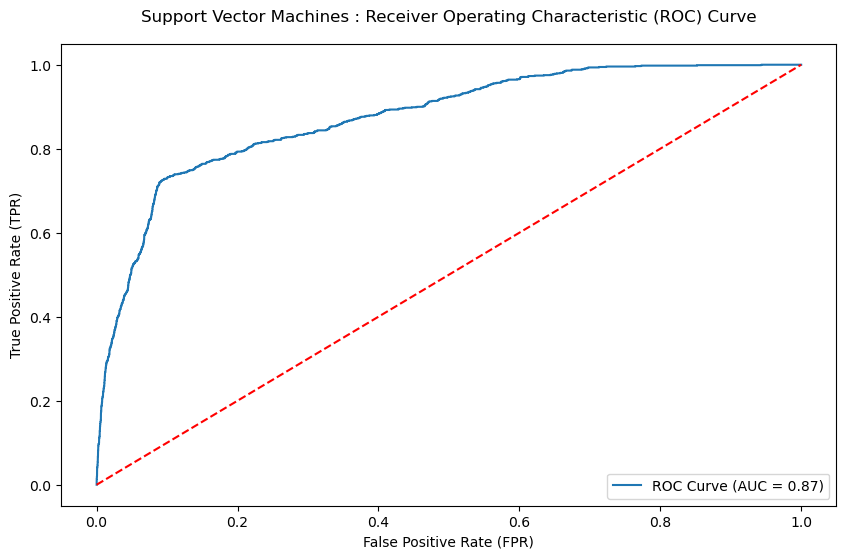

In [56]:
# Evaluate all the Model

final_results = {}

for model_name, model in model_dict.items():
    final_results[model_name] = evaluate_model(model, model_name, False)
    print('\n','='*120,'\n')

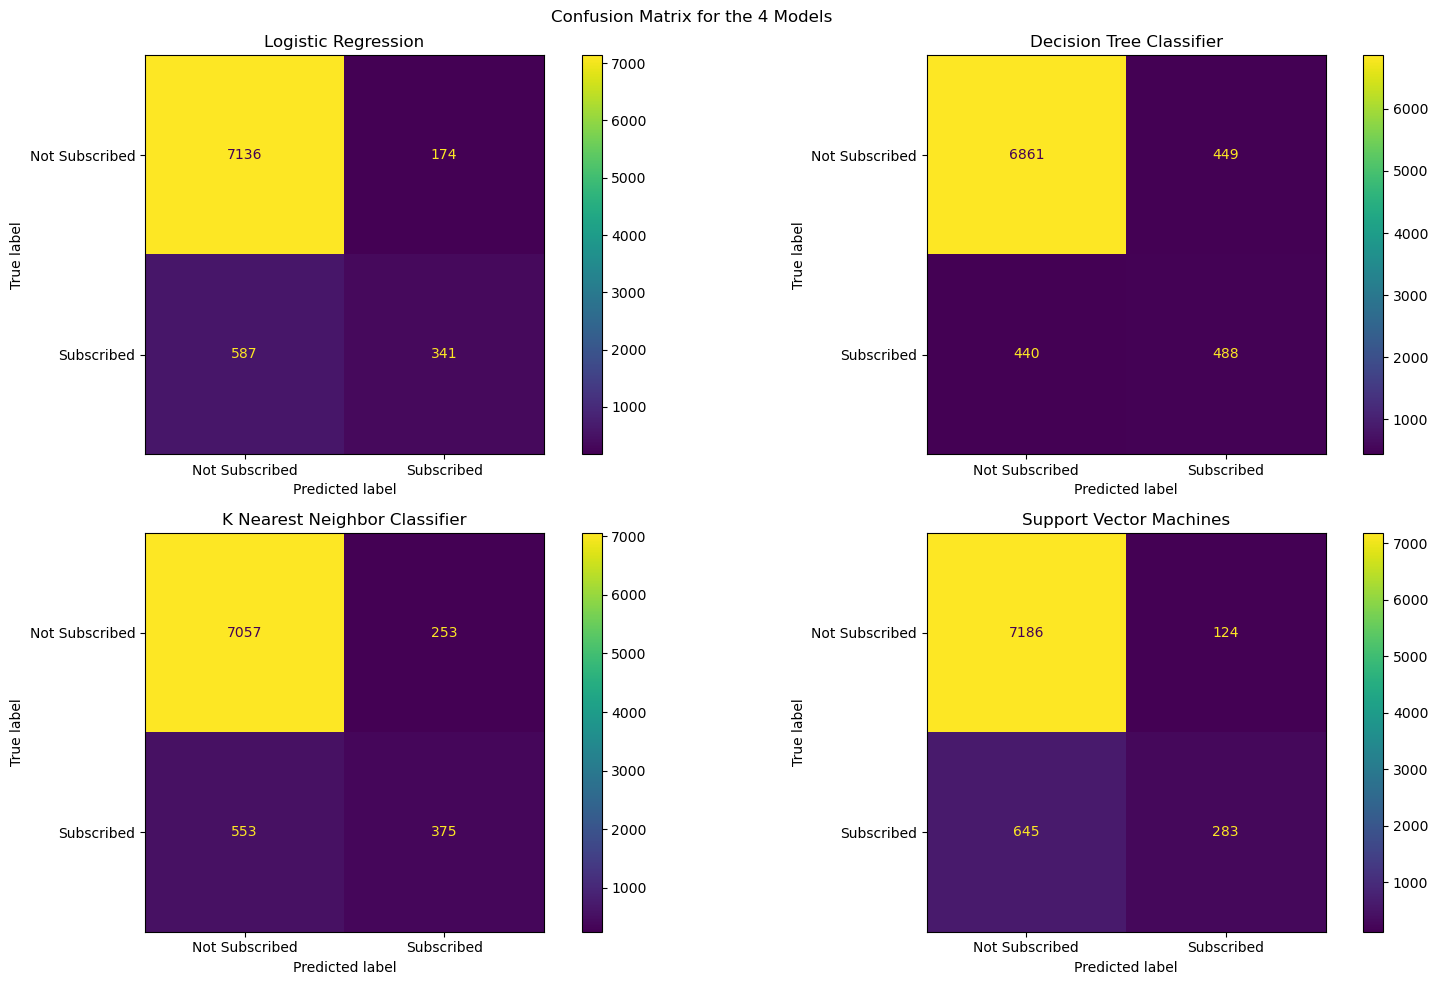

In [57]:
# Creating a 2x2 Grid of the Confusion Matrix for the 4 models

fig, axes = plt.subplots(2, 2, figsize=(16, 10))    # Create a 2x2 grid of subplots
fig.suptitle('Confusion Matrix for the 4 Models')  # Add a title for the entire figure

# Counter to keep track of subplot position
plot_count = 0

for model_name, results in final_results.items():
    if model_name == 'Dummy Classifier': 
        #remove confusion matrix from final results
        final_results[model_name] = results[:-1]
        continue
    r,c = int(plot_count/2),int(plot_count%2)

    # Get the Confusion Matrix from the result set. The last value in the list is the Confusion Matrix for each Model
    
    conf_matrix = results[-1]

    #remove confusion matrix from final results
    final_results[model_name] = results[:-1]
    
    # Visualizing Confusion Matrix
    disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['Not Subscribed', 'Subscribed'])

    # plot the Confusion Matrix Graph to the appropriate axes
    
    disp.plot(ax=axes[r,c])

    # set the title of each axes to the corresponding model name
    axes[r,c].set_title(f'{model_name}')

    plot_count += 1

plt.tight_layout()
plt.savefig('Confusion Matrix Comparison for 4 Models.png')
plt.show()

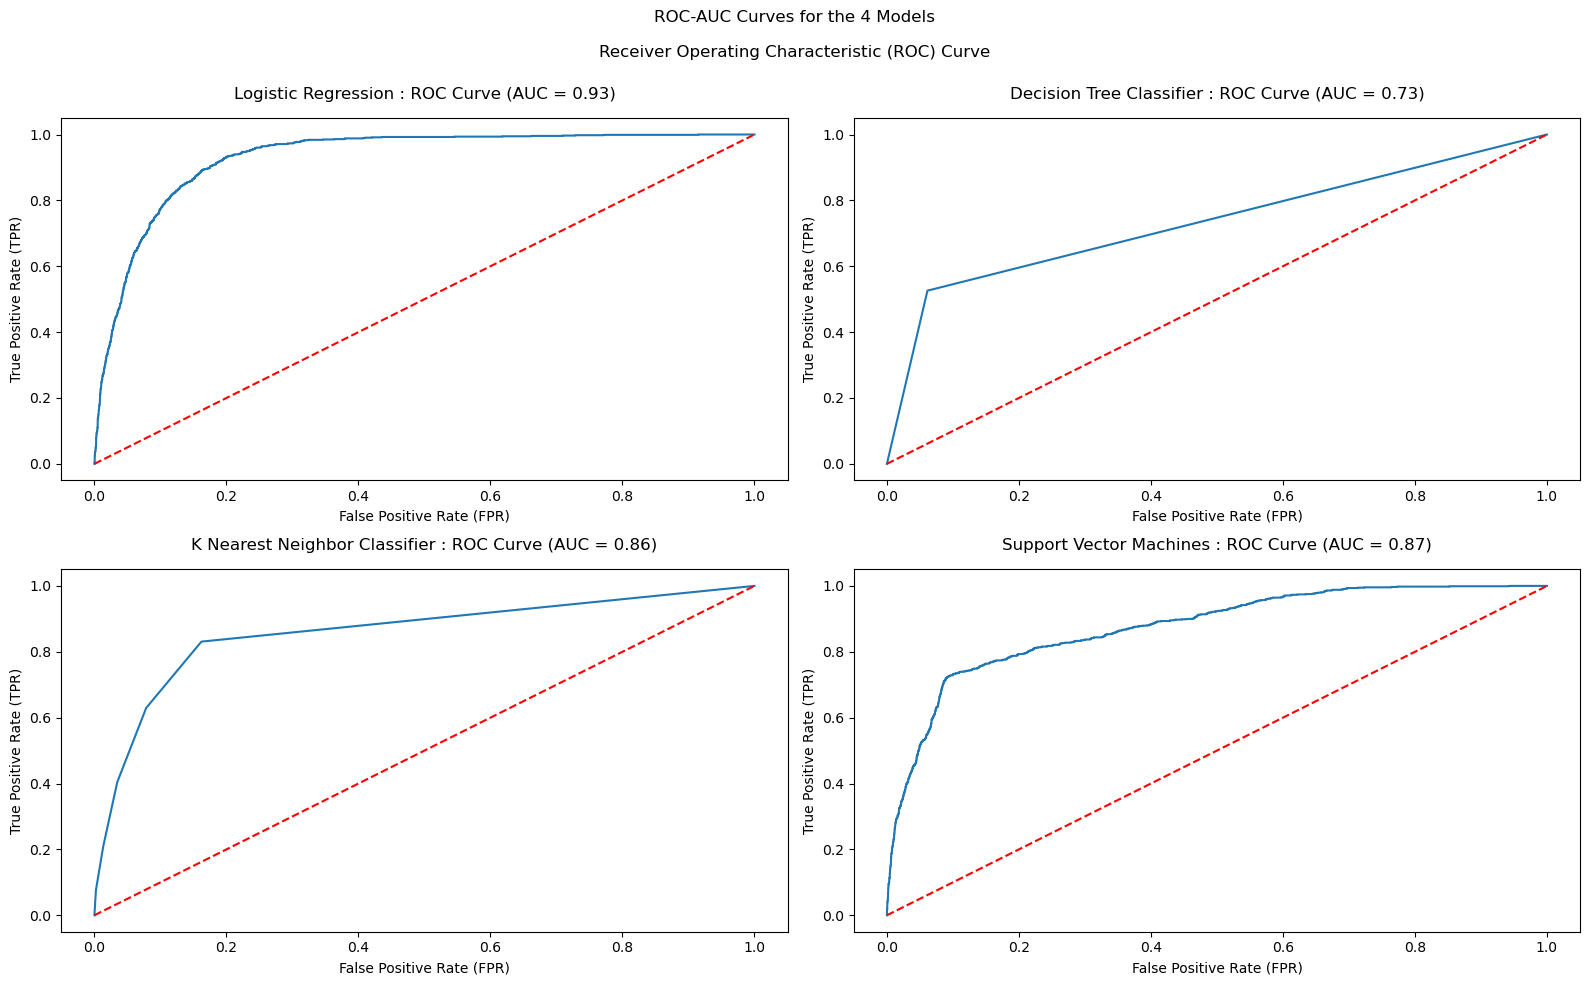

In [58]:
# Creating a 2x2 Grid of the ROC-AUC Curves for the 4 models
fig, axes = plt.subplots(2, 2, figsize=(16, 10))    # Create a 2x2 grid of subplots
fig.suptitle('ROC-AUC Curves for the 4 Models\n\nReceiver Operating Characteristic (ROC) Curve\n')  # Add a title for the entire figure

# Counter to keep track of subplot position
plot_count = 0

for model_name, results in final_results.items():
    if model_name == 'Dummy Classifier': 
        #remove fpr and tpr from final results
        final_results[model_name] = results[:-2]
        continue
    r,c = int(plot_count/2),int(plot_count%2)

    # Get the Confusion Matrix from the result set. The last value in the list is the Confusion Matrix for each Model
    
    fpr, tpr = results[-2], results[-1]

    #remove fpr and tpr from final results
    final_results[model_name] = results[:-2]
    roc_auc_val = results[7]
    
    # plot the ROC AUC Curve to the appropriate axes
    label_val = 'ROC Curve (AUC = ' + roc_auc_val + ')'
    
    axes[r,c].plot(fpr, tpr, label=label_val)
    axes[r,c].plot([0, 1], [0, 1], 'k--',color='red')
    axes[r,c].set_xlabel('False Positive Rate (FPR)')
    axes[r,c].set_ylabel('True Positive Rate (TPR)')
    axes[r,c].set_title(f'{model_name} : {label_val}',y=1.03)
    
    # set the title of each axes to the corresponding model name
    #axes[r,c].set_title(f'{model_name}')

    plot_count += 1

plt.tight_layout()
plt.savefig('ROC-AUC Curve Comparison for 4 Models.png')
plt.show()

In [59]:
final_df = pd.DataFrame(final_results).T
final_df.columns = ['Train Time', 'Train Accuracy', 'Test Accuracy', 'Precision Score', 
                    'Recall Score', 'Accuracy Score', 'F1 Score', 'ROC AUC', 
                   'True Negative', 'False Positive', 'False Negative', 'True Positive'] 
final_df

Train Time Train Accuracy Test Accuracy  \
Dummy Classifier                  0.0018           0.89          0.89   
Logistic Regression               0.1521           0.91          0.91   
Decision Tree Classifier          0.1136           1.00          0.89   
K Nearest Neighbor Classifier     0.0027           0.93          0.90   
Support Vector Machines          30.8420           0.90          0.91   

                              Precision Score Recall Score Accuracy Score  \
Dummy Classifier                         0.00         0.00           0.89   
Logistic Regression                      0.66         0.37           0.91   
Decision Tree Classifier                 0.52         0.53           0.89   
K Nearest Neighbor Classifier            0.60         0.40           0.90   
Support Vector Machines                  0.70         0.30           0.91   

                              F1 Score ROC AUC True Negative False Positive  \
Dummy Classifier                  0.00    0.50          7310              0   
Logistic Regression               0.47    0.93          7136            174   
Decision Tree Classifier          0.52    0.73          6861            449   
K Nearest Neighbor Classifier     0.48    0.86          7057            253   
Support Vector Machines           0.42    0.87          7186            124   

                              False Negative True Positive  
Dummy Classifier                         928             0  
Logistic Regression                      587           341  
Decision Tree Classifier                 440           488  
K Nearest Neighbor Classifier            553           375  
Support Vector Machines                  645           283

**Observation:**  
- Based on the results shown above, we can see that Logistic Regression and Support Vector Machines have a very good accuracy score of 0.91  
- However, we also see that Support Vector Machines takes 30 seconds to process 7186 records while Logistic Regression takes only 0.15 seconds for 7136 records.  
- Decision Tree Classifer and K Nearest Neighbor have a fairly lower accuracy score with Decision Tree Classifier getting fewer items correct.  
- Looking at the performance, K Nearest Neighbor has the best time while maintaining a competitive accuracy score. 
- Overall, I would recommend Logistic Regresion as the choice of model if we were to scale the test to a bigger dataset as the accuracy score of 0.91 and the ROC-AUC curve is 0.93

**Opportunity:** 
- Improve the Recall Score as they are ranging from 0.30 (SVM) to 0.52 (Decision Tree)

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [60]:
# Let's explore each of the columns to see if we can find a reason to keep or remove them from the observations

**Column : marital**

In [61]:
df_marital = df.groupby(['marital', 'y']).size().unstack()
df_marital['ratio'] = round(df_marital['yes'] / (df_marital['yes'] + df_marital['no']),2)
df_marital

y            no   yes  ratio
marital                     
divorced   4136   476   0.10
married   22396  2532   0.10
single     9948  1620   0.14
unknown      68    12   0.15

**Observation:**  
Based on the ratio, it looks like around 10-15% of the dataset is by default considered to subscribe to promotional CDs  
However, there is a clear difference between single and married/divorced individuals. So we will have to keep this column

**Column : education**

In [62]:
df_educated = df.groupby(['education', 'y']).size().unstack()
df_educated['ratio'] = round(df_educated['yes'] / (df_educated['yes'] + df_educated['no']),2)
df_educated

y                       no   yes  ratio
education                              
basic.4y              3748   428   0.10
basic.6y              2104   188   0.08
basic.9y              5572   473   0.08
high.school           8484  1031   0.11
illiterate              14     4   0.22
professional.course   4648   595   0.11
university.degree    10498  1670   0.14
unknown               1480   251   0.15

**Observation:**  
Based on the ratio, it looks like around 08-22% of the dataset consider to subscribe for promotional CDs  
Since there is no consistency, we cannot remove this column from our analysis. 

**Column : default**

In [63]:
df_default = df.groupby(['default', 'y']).size().unstack()
df_default['ratio'] = round(df_default['yes'] / (df_default['yes'] + df_default['no']),2)
df_default

y             no     yes  ratio
default                        
no       28391.0  4197.0   0.13
unknown   8154.0   443.0   0.05
yes          3.0     NaN    NaN

In [64]:
df[(df['default']=='no') & (df['y']=='yes')]

age          job  marital            education default housing loan  \
88      49   technician  married             basic.9y      no      no   no   
182     42  blue-collar  married             basic.9y      no     yes  yes   
286     39    housemaid  married             basic.9y      no     yes   no   
389     44     services  married          high.school      no     yes   no   
446     42   technician  married  professional.course      no      no   no   
...    ...          ...      ...                  ...     ...     ...  ...   
41174   62      retired  married    university.degree      no     yes   no   
41178   62      retired  married    university.degree      no      no   no   
41181   37       admin.  married    university.degree      no     yes   no   
41183   73      retired  married  professional.course      no     yes   no   
41186   44   technician  married  professional.course      no      no   no   

         contact month day_of_week  ...  campaign  pdays  previous  \
88     telephone   may         mon  ...         1    999         0   
182    telephone   may         mon  ...         2    999         0   
286    telephone   may         mon  ...         3    999         0   
389    telephone   may         tue  ...         1    999         0   
446    telephone   may         tue  ...         1    999         0   
...          ...   ...         ...  ...       ...    ...       ...   
41174   cellular   nov         thu  ...         1      1         6   
41178   cellular   nov         thu  ...         2      6         3   
41181   cellular   nov         fri  ...         1    999         0   
41183   cellular   nov         fri  ...         1    999         0   
41186   cellular   nov         fri  ...         1    999         0   

          poutcome emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  \
88     nonexistent          1.1          93.994          -36.4      4.857   
182    nonexistent          1.1          93.994          -36.4      4.857   
286    nonexistent          1.1          93.994          -36.4      4.857   
389    nonexistent          1.1          93.994          -36.4      4.857   
446    nonexistent          1.1          93.994          -36.4      4.857   
...            ...          ...             ...            ...        ...   
41174      success         -1.1          94.767          -50.8      1.031   
41178      success         -1.1          94.767          -50.8      1.031   
41181  nonexistent         -1.1          94.767          -50.8      1.028   
41183  nonexistent         -1.1          94.767          -50.8      1.028   
41186  nonexistent         -1.1          94.767          -50.8      1.028   

       nr_employed    y  
88          5191.0  yes  
182         5191.0  yes  
286         5191.0  yes  
389         5191.0  yes  
446         5191.0  yes  
...            ...  ...  
41174       4963.6  yes  
41178       4963.6  yes  
41181       4963.6  yes  
41183       4963.6  yes  
41186       4963.6  yes  

[4197 rows x 21 columns]

**Observation:**  
There are no records with default value as 'yes' and customers have subscribed to promotional CD. However, there are many customers with default value of 'no' or 'unknown' and subscribed to promotional CD. Due to this we will have to keep this column as well

**Column : job**

In [65]:
df_job = df.groupby(['job', 'y']).size().unstack()
df_job['ratio'] = round(df_job['yes'] / (df_job['yes'] + df_job['no']),2)
df_job

y                no   yes  ratio
job                             
admin.         9070  1352   0.13
blue-collar    8616   638   0.07
entrepreneur   1332   124   0.09
housemaid       954   106   0.10
management     2596   328   0.11
retired        1286   434   0.25
self-employed  1272   149   0.10
services       3646   323   0.08
student         600   275   0.31
technician     6013   730   0.11
unemployed      870   144   0.14
unknown         293    37   0.11

**Observation:** 
The job does not provide a clear distinction for subscription or not. So we will have to keep this column as it can influence the prediction.

**Column : housing**

In [66]:
df_housing = df.groupby(['housing', 'y']).size().unstack()
df_housing['ratio'] = round(df_housing['yes'] / (df_housing['yes'] + df_housing['no']),2)
df_housing

y           no   yes  ratio
housing                    
no       16596  2026   0.11
unknown    883   107   0.11
yes      19069  2507   0.12

**Observation:** 
Based on the ratio, it looks like housing does not have an influence in the decision for subscription. We can remove this from the evaluation

In [67]:
# Drop column housing as it does not provide additional value to the analysis
df_revised.drop(columns='housing',axis=1, inplace=True)
df_revised.columns

Index(['age', 'job', 'marital', 'education', 'default', 'loan', 'contact',
       'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'y'],
      dtype='object')

In [68]:
df_revised.columns

Index(['age', 'job', 'marital', 'education', 'default', 'loan', 'contact',
       'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'y'],
      dtype='object')

**Column: loan**

In [69]:
df_loan = df.groupby(['loan', 'y']).size().unstack()
df_loan['ratio'] = round(df_loan['yes'] / (df_loan['yes'] + df_loan['no']),2)
df_loan

y           no   yes  ratio
loan                       
no       30100  3850   0.11
unknown    883   107   0.11
yes       5565   683   0.11

**Observation:** 
Based on the ratio, it looks like loan does not have an influence in the decision for subscription. We can remove this from the evaluation

In [70]:
# Drop column housing as it does not provide additional value to the analysis
df_revised.drop(columns='loan',axis=1, inplace=True)
df_revised.columns

Index(['age', 'job', 'marital', 'education', 'default', 'contact', 'month',
       'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'y'],
      dtype='object')

**Column: poutcome**

In [71]:
df_poutcome = df.groupby(['poutcome', 'y']).size().unstack()
df_poutcome['ratio'] = round(df_poutcome['yes'] / (df_poutcome['yes'] + df_poutcome['no']),2)
df_poutcome

y               no   yes  ratio
poutcome                       
failure       3647   605   0.14
nonexistent  32422  3141   0.09
success        479   894   0.65

**Observation:** 
poutcome has a direct impact on the subscription. We will keep this column

**Column: emp_var_rate**

In [72]:
df_emp_var_rate = df.groupby(['emp_var_rate', 'y']).size().unstack()
df_emp_var_rate['ratio'] = round(df_emp_var_rate['yes'] / (df_emp_var_rate['yes'] + df_emp_var_rate['no']),2)
df_emp_var_rate

y                no   yes  ratio
emp_var_rate                    
-3.4            617   454   0.42
-3.0             84    88   0.51
-2.9           1069   594   0.36
-1.8           7723  1461   0.16
-1.7            370   403   0.52
-1.1            334   301   0.47
-0.2              9     1   0.10
-0.1           3451   232   0.06
 1.1           7523   240   0.03
 1.4          15368   866   0.05

**Observation:** 
emp_var_rate has a direct impact on the subscription. We will keep this column

**Column: cons_price_idx**

In [73]:
df_cons_price_idx = df.groupby(['cons_price_idx', 'y']).size().unstack()
df_cons_price_idx['ratio'] = round(df_cons_price_idx['yes'] / (df_cons_price_idx['yes'] + df_cons_price_idx['no']),2)
df_cons_price_idx

y                 no  yes  ratio
cons_price_idx                  
92.201           506  264   0.34
92.379           161  106   0.40
92.431           267  180   0.40
92.469           112   66   0.37
92.649           189  168   0.47
92.713            84   88   0.51
92.756             9    1   0.10
92.843           156  126   0.45
92.893          5270  524   0.09
92.963           451  264   0.37
93.075          2016  442   0.18
93.200          3426  190   0.05
93.369           114  150   0.57
93.444          4904  271   0.05
93.749            77   97   0.56
93.798            25   42   0.63
93.876            90  122   0.58
93.918          6278  407   0.06
93.994          7523  240   0.03
94.027           113  120   0.52
94.055           122  107   0.47
94.199           153  150   0.50
94.215           135  176   0.57
94.465          4186  188   0.04
94.601           111   93   0.46
94.767            70   58   0.45

**Observation:** 
cons_price_idx has a direct impact on the subscription. We will keep this column

**Column: cons_conf_idx**

In [74]:
df_cons_conf_idx = df.groupby(['cons_conf_idx', 'y']).size().unstack()
df_cons_conf_idx['ratio'] = round(df_cons_conf_idx['yes'] / (df_cons_conf_idx['yes'] + df_cons_conf_idx['no']),2)
df_cons_conf_idx

y                no  yes  ratio
cons_conf_idx                  
-50.8            70   58   0.45
-50.0           156  126   0.45
-49.5           111   93   0.46
-47.1          2016  442   0.18
-46.2          5270  524   0.09
-45.9             9    1   0.10
-42.7          6278  407   0.06
-42.0          3426  190   0.05
-41.8          4186  188   0.04
-40.8           451  264   0.37
-40.4            25   42   0.63
-40.3           135  176   0.57
-40.0            90  122   0.58
-39.8           122  107   0.47
-38.3           113  120   0.52
-37.5           153  150   0.50
-36.4          7523  240   0.03
-36.1          4904  271   0.05
-34.8           114  150   0.57
-34.6            77   97   0.56
-33.6           112   66   0.37
-33.0            84   88   0.51
-31.4           506  264   0.34
-30.1           189  168   0.47
-29.8           161  106   0.40
-26.9           267  180   0.40

**Observation:** 
cons_conf_idx has a direct impact on the subscription. We will keep this column

**Column: euribor3m**

In [75]:
df_euribor3m = df.groupby(['euribor3m', 'y']).size().unstack()
df_euribor3m['ratio'] = round(df_euribor3m['yes'] / (df_euribor3m['yes'] + df_euribor3m['no']),2)
df_euribor3m

y             no   yes  ratio
euribor3m                    
0.634        2.0   6.0   0.75
0.635       21.0  22.0   0.51
0.636       11.0   3.0   0.21
0.637        1.0   5.0   0.83
0.638        2.0   5.0   0.71
...          ...   ...    ...
4.967      610.0  33.0   0.05
4.968      935.0  57.0   0.06
4.970      168.0   4.0   0.02
5.000        4.0   3.0   0.43
5.045        4.0   5.0   0.56

[316 rows x 3 columns]

**Observation:** 
euribor3m has a direct impact on the subscription. We will keep this column

In [76]:
# Since we removed some of the data from df_revised, let's split the data into X and y again

X = df_revised.drop('y', axis = 1)
y = df_revised['y']

**Train Test Split** 

In [77]:
# Let's split the data into training and test sets. We will use 80% of the data for training and 20% for test.
# stratify argument ensures that the same proportion of examples is preserved across each class of training and testing data.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42,stratify=y)

In [78]:
model_dict = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'K Nearest Neighbor Classifier': KNeighborsClassifier(),
    'Support Vector Machines': SVC(probability=True)
}

In [79]:
# We will also introduce some hyperparameters to see if the models can do better

param_grids = {
    'Logistic Regression': {
        'classifier__C': [0.01, 0.1, 1, 10, 100],
        'classifier__penalty': ['l2'],
        'classifier__solver': ['lbfgs', 'saga']
    },
    
    'Decision Tree Classifier': {
        'classifier__criterion': ['gini', 'entropy'],
        'classifier__max_depth': [None, 10, 20, 30, 40, 50],
        'classifier__min_samples_split': [2, 5, 10]
    },
    
    'K Nearest Neighbor Classifier': {
        'classifier__n_neighbors': [3, 5, 7, 9, 11],
        'classifier__weights': ['uniform', 'distance'],
        'classifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    },
    
    'Support Vector Machines': {
        'classifier__C': [0.1, 1, 10, 100],
        'classifier__kernel': ['linear', 'rbf'],
        'classifier__gamma': ['scale', 'auto']
    }
}

In [80]:
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder, label_binarize
from sklearn.model_selection import GridSearchCV

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Results for Logistic Regression

Training Time     : 1.8013 seconds

Training Accuracy : 0.91

Test     Accuracy : 0.91

Performance Report for Logistic Regression

Precision is: 0.70
Recall    is: 0.40
F1 Score  is: 0.51
Accuracy  is: 0.91

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7310
           1       0.70      0.40      0.51       928

    accuracy                           0.91      8238
   macro avg       0.81      0.69      0.73      8238
weighted avg       0.90      0.91      0.90      8238

Results for Logistic Regression

Confusion Matrix:

[[7148  162]
 [ 555  373]]

True Negative  : 7148
False Positive :  162
False Negative :  555
True Positive  :  373

Predicted     0    1   All
True                      
0          7148  162  7310
1           555  373   928
All        7703  535  8238


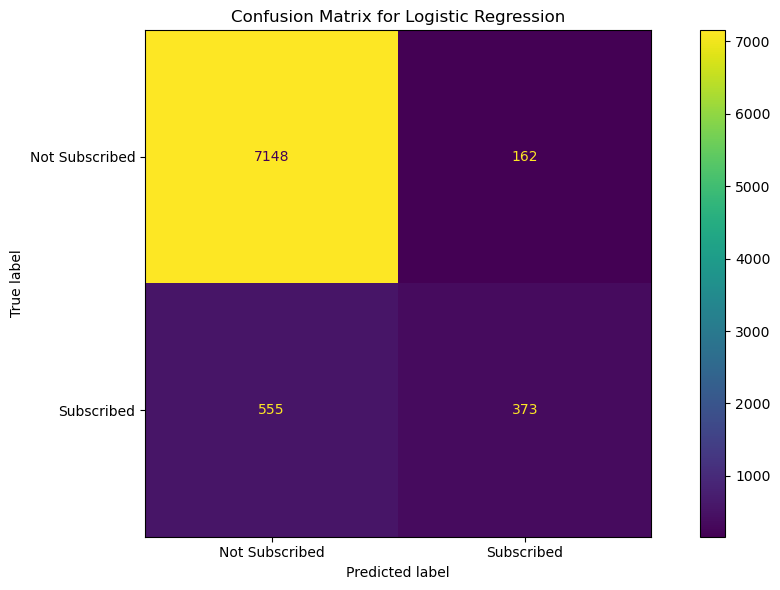

Model Name: Logistic Regression

The ROC Accuracy Score : ROC-AUC is 0.93



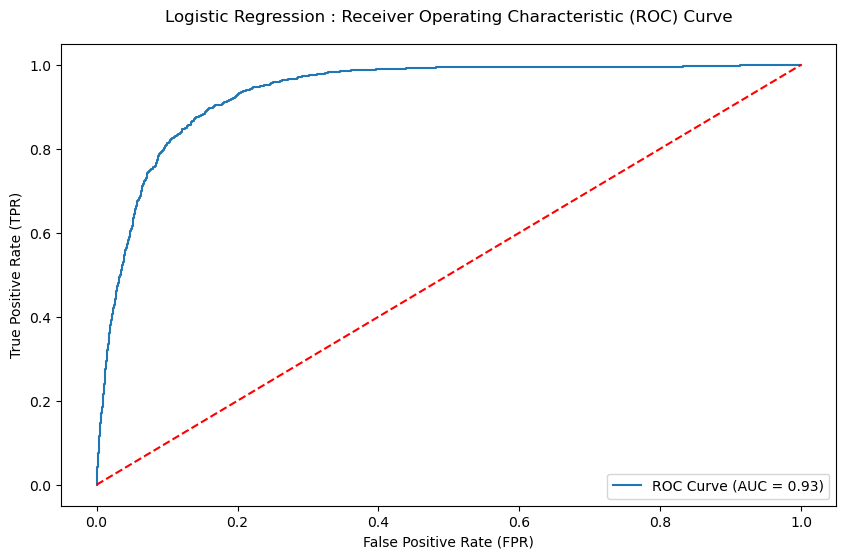



Fitting 5 folds for each of 36 candidates, totalling 180 fits
Results for Decision Tree Classifier

Training Time     : 2.0337 seconds

Training Accuracy : 0.93

Test     Accuracy : 0.91

Performance Report for Decision Tree Classifier

Precision is: 0.64
Recall    is: 0.53
F1 Score  is: 0.58
Accuracy  is: 0.91

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7310
           1       0.64      0.53      0.58       928

    accuracy                           0.91      8238
   macro avg       0.79      0.75      0.77      8238
weighted avg       0.91      0.91      0.91      8238

Results for Decision Tree Classifier

Confusion Matrix:

[[7035  275]
 [ 438  490]]

True Negative  : 7035
False Positive :  275
False Negative :  438
True Positive  :  490

Predicted     0    1   All
True                      
0          7035  275  7310
1           438  490   928
All        7473  765  8238


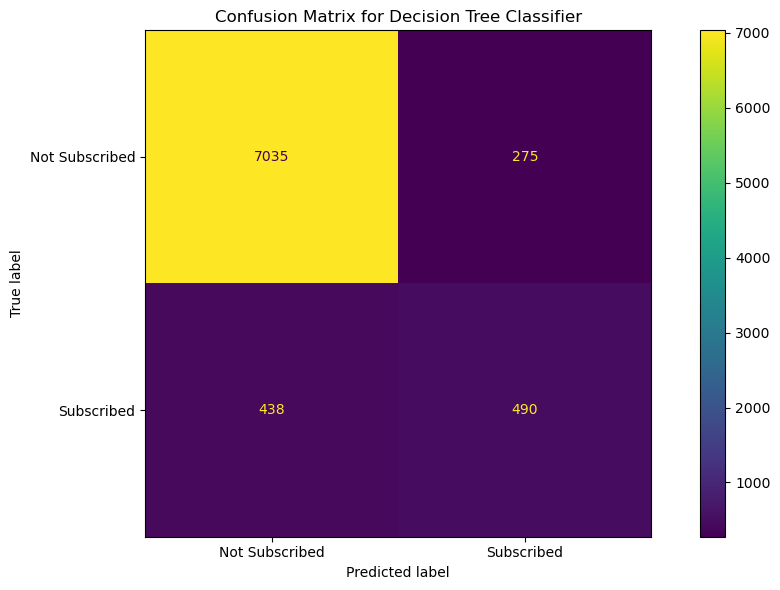

Model Name: Decision Tree Classifier

The ROC Accuracy Score : ROC-AUC is 0.90



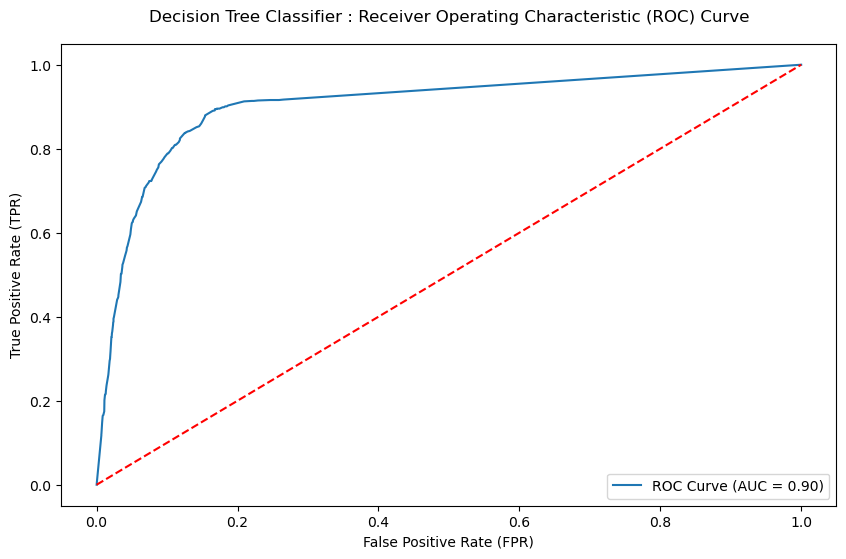



Fitting 5 folds for each of 40 candidates, totalling 200 fits
Results for K Nearest Neighbor Classifier

Training Time     : 20.8421 seconds

Training Accuracy : 1.00

Test     Accuracy : 0.91

Performance Report for K Nearest Neighbor Classifier

Precision is: 0.66
Recall    is: 0.46
F1 Score  is: 0.54
Accuracy  is: 0.91

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7310
           1       0.66      0.46      0.54       928

    accuracy                           0.91      8238
   macro avg       0.80      0.71      0.75      8238
weighted avg       0.90      0.91      0.91      8238

Results for K Nearest Neighbor Classifier

Confusion Matrix:

[[7093  217]
 [ 504  424]]

True Negative  : 7093
False Positive :  217
False Negative :  504
True Positive  :  424

Predicted     0    1   All
True                      
0          7093  217  7310
1           504  424   928
All        7597  641  8238


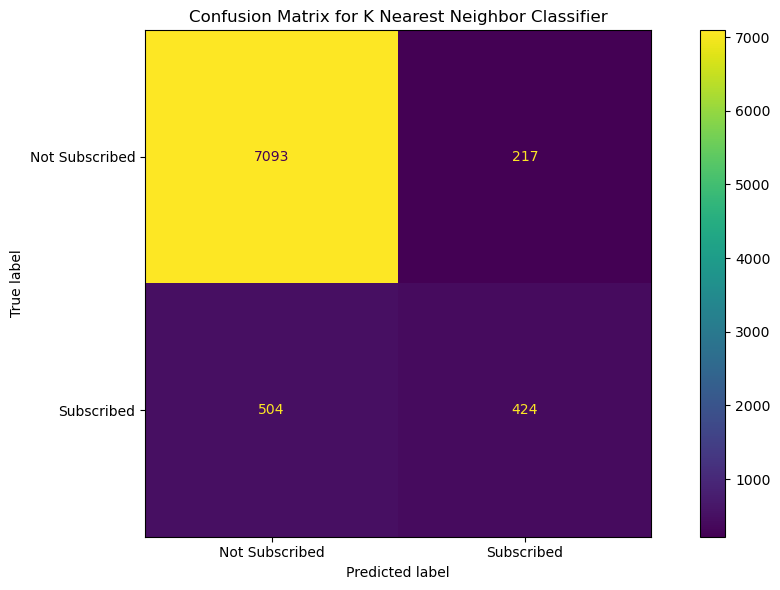

Model Name: K Nearest Neighbor Classifier

The ROC Accuracy Score : ROC-AUC is 0.92



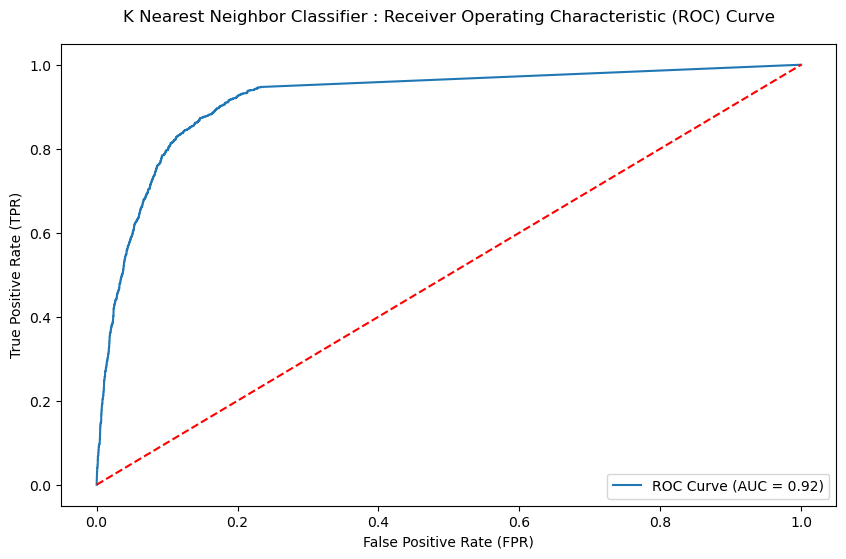



Fitting 5 folds for each of 16 candidates, totalling 80 fits
Results for Support Vector Machines

Training Time     : 1966.4180 seconds

Training Accuracy : 0.92

Test     Accuracy : 0.92

Performance Report for Support Vector Machines

Precision is: 0.73
Recall    is: 0.40
F1 Score  is: 0.51
Accuracy  is: 0.92

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7310
           1       0.73      0.40      0.51       928

    accuracy                           0.92      8238
   macro avg       0.83      0.69      0.73      8238
weighted avg       0.91      0.92      0.90      8238

Results for Support Vector Machines

Confusion Matrix:

[[7174  136]
 [ 561  367]]

True Negative  : 7174
False Positive :  136
False Negative :  561
True Positive  :  367

Predicted     0    1   All
True                      
0          7174  136  7310
1           561  367   928
All        7735  503  8238


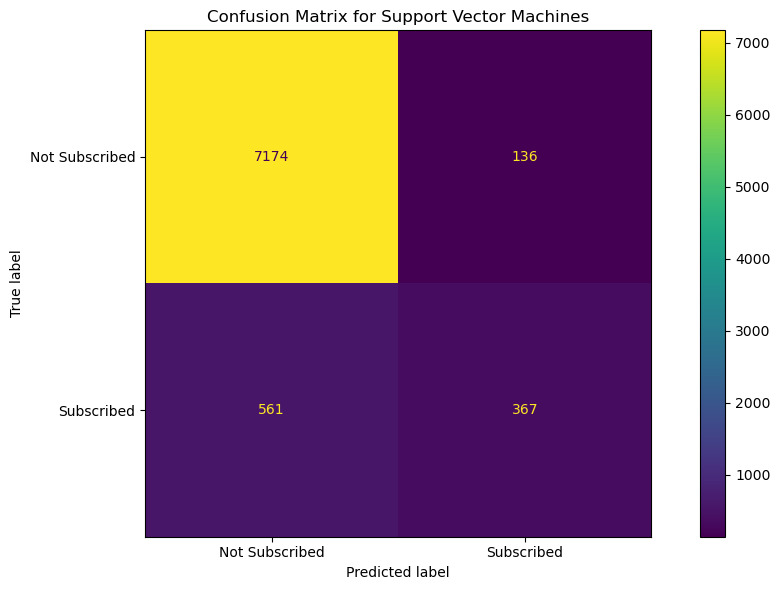

Model Name: Support Vector Machines

The ROC Accuracy Score : ROC-AUC is 0.91



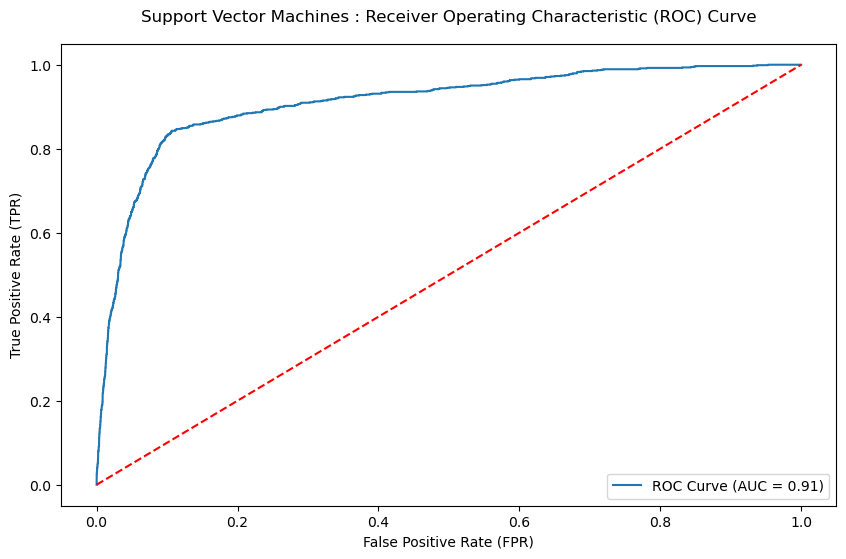

In [81]:
# Evaluate Logistic Regression Model

final_results = {}

for model_name, model in model_dict.items():
    pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('classifier', model)
    ])
    grid_search = GridSearchCV(pipeline, param_grids[model_name], cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
    final_results[model_name] = evaluate_model(grid_search, model_name, True)
    print('\n','='*120,'\n')

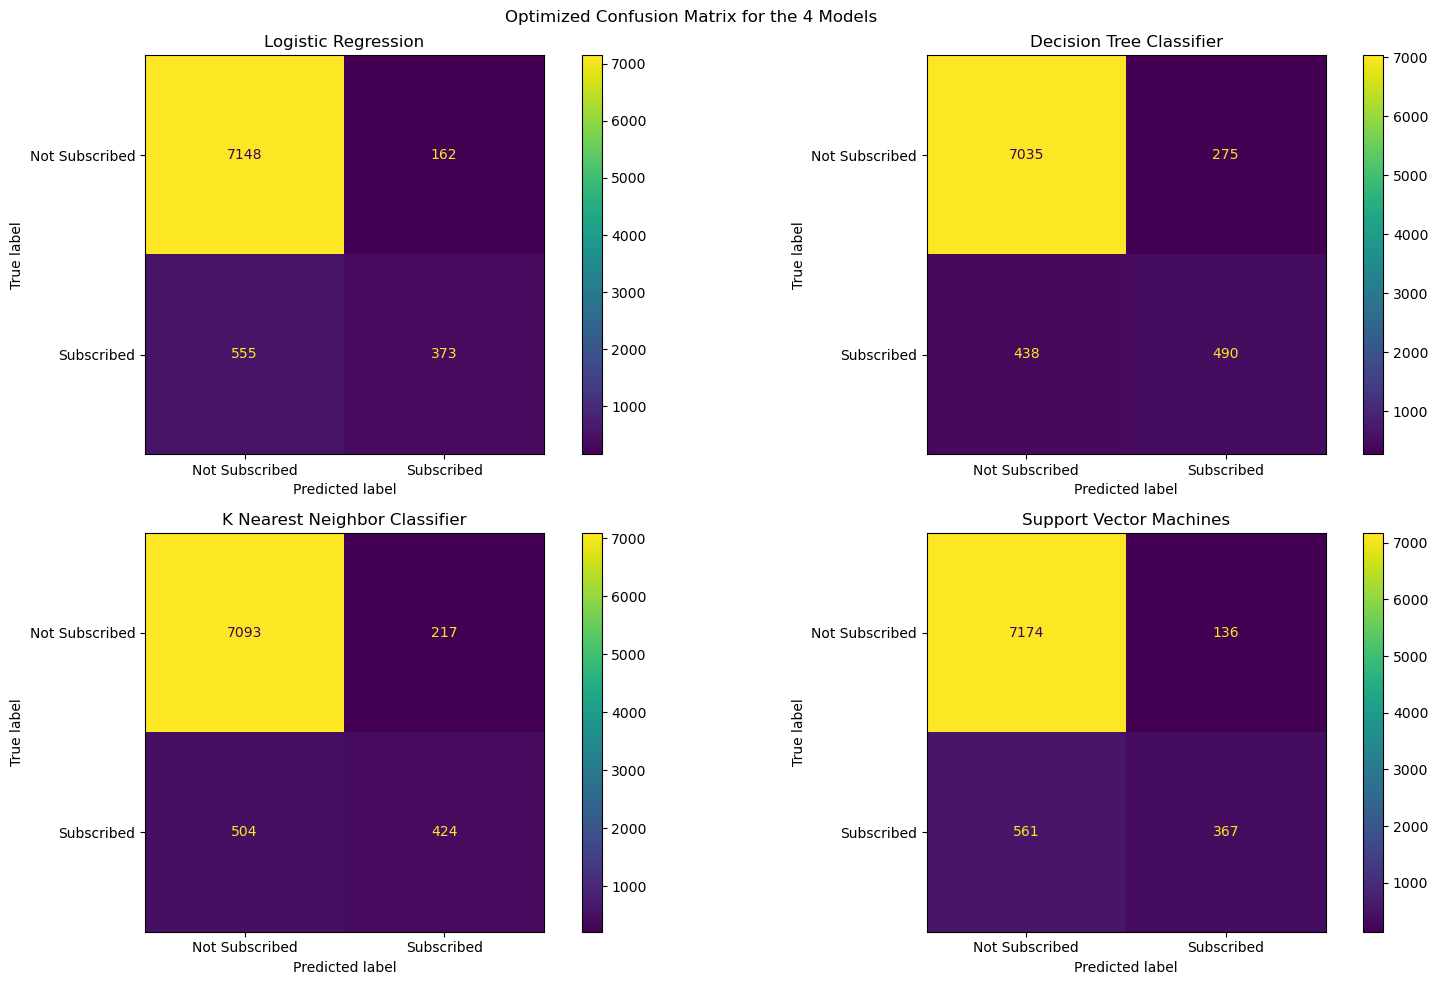

In [82]:
# Creating a 2x2 Grid of the Confusion Matrix for the 4 models

fig, axes = plt.subplots(2, 2, figsize=(16, 10))    # Create a 2x2 grid of subplots
fig.suptitle('Optimized Confusion Matrix for the 4 Models')  # Add a title for the entire figure

# Counter to keep track of subplot position
plot_count = 0

for model_name, results in final_results.items():
    if model_name == 'Dummy Classifier': 
        #remove confusion matrix from final results
        final_results[model_name] = results[:-1]
        continue
    r,c = int(plot_count/2),int(plot_count%2)

    # Get the Confusion Matrix from the result set. The last value in the list is the Confusion Matrix for each Model
    
    conf_matrix = results[-1]

    #remove confusion matrix from final results
    final_results[model_name] = results[:-1]
    
    # Visualizing Confusion Matrix
    disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['Not Subscribed', 'Subscribed'])

    # plot the Confusion Matrix Graph to the appropriate axes
    
    disp.plot(ax=axes[r,c])

    # set the title of each axes to the corresponding model name
    axes[r,c].set_title(f'{model_name}')

    plot_count += 1

plt.tight_layout()
plt.savefig('Optimized Confusion Matrix Comparison for 4 Models.png')
plt.show()

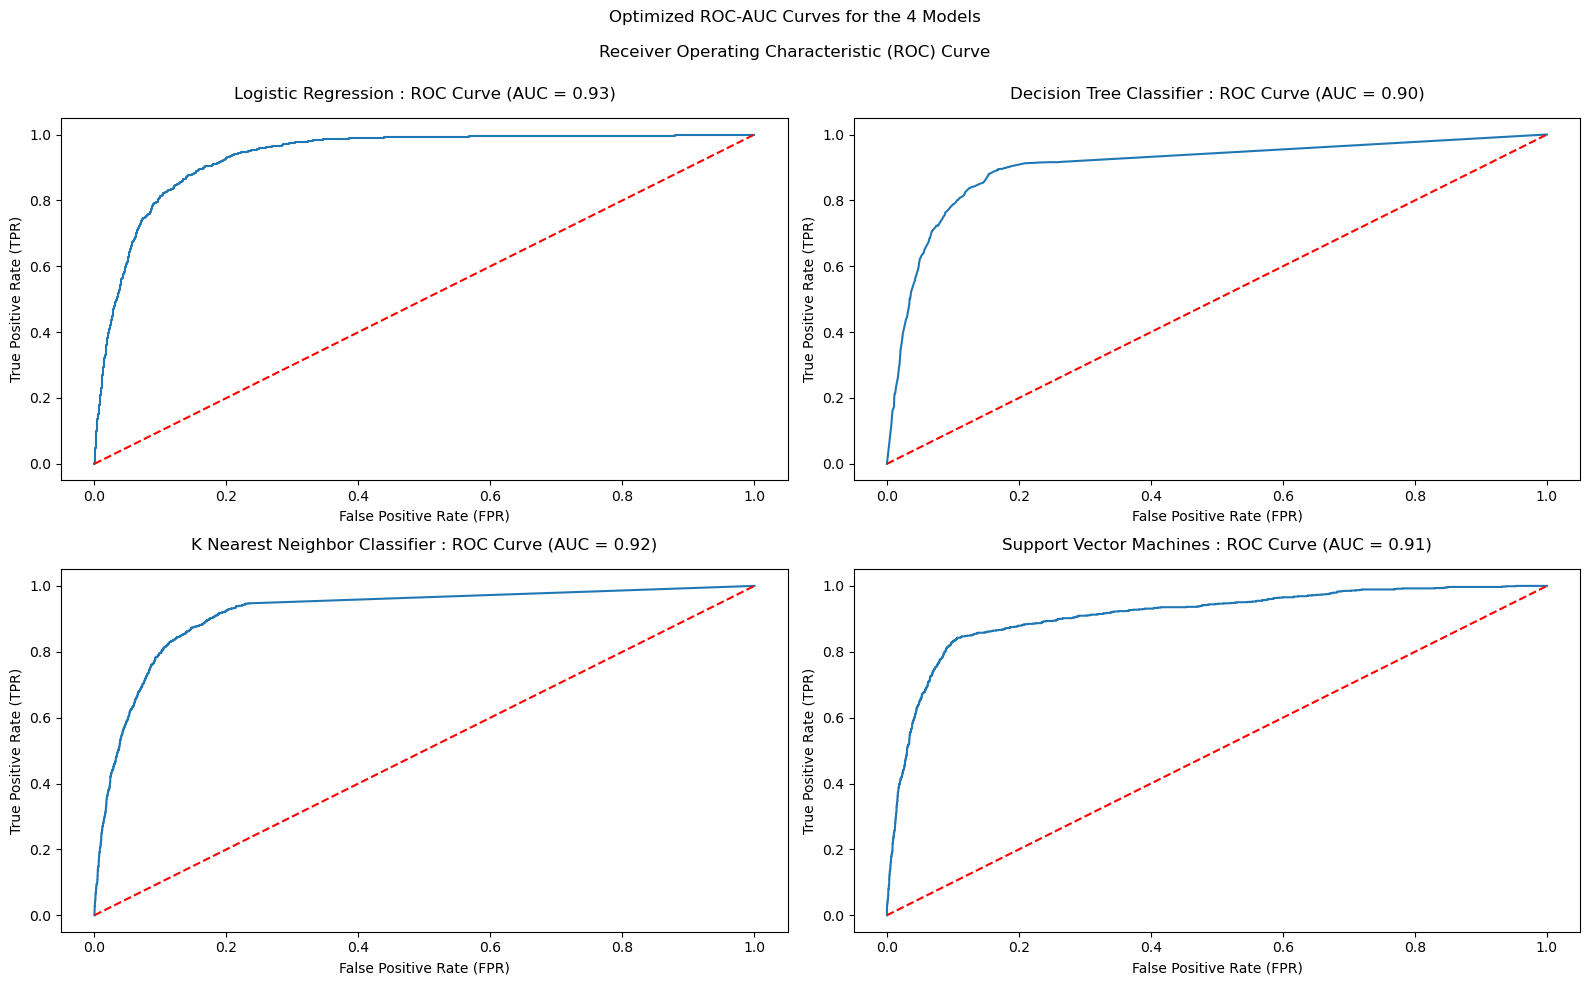

In [83]:
# Creating a 2x2 Grid of the ROC-AUC Curves for the 4 models
fig, axes = plt.subplots(2, 2, figsize=(16, 10))    # Create a 2x2 grid of subplots
fig.suptitle('Optimized ROC-AUC Curves for the 4 Models\n\nReceiver Operating Characteristic (ROC) Curve\n')  # Add a title for the entire figure

# Counter to keep track of subplot position
plot_count = 0

for model_name, results in final_results.items():
    if model_name == 'Dummy Classifier': 
        #remove fpr and tpr from final results
        final_results[model_name] = results[:-2]
        continue
    r,c = int(plot_count/2),int(plot_count%2)

    # Get the Confusion Matrix from the result set. The last value in the list is the Confusion Matrix for each Model
    
    fpr, tpr = results[-2], results[-1]

    #remove fpr and tpr from final results
    final_results[model_name] = results[:-2]
    roc_auc_val = results[7]
    
    # plot the ROC AUC Curve to the appropriate axes
    label_val = 'ROC Curve (AUC = ' + roc_auc_val + ')'
    
    axes[r,c].plot(fpr, tpr, label=label_val)
    axes[r,c].plot([0, 1], [0, 1], 'k--',color='red')
    axes[r,c].set_xlabel('False Positive Rate (FPR)')
    axes[r,c].set_ylabel('True Positive Rate (TPR)')
    axes[r,c].set_title(f'{model_name} : {label_val}',y=1.03)
    
    # set the title of each axes to the corresponding model name
    #axes[r,c].set_title(f'{model_name}')

    plot_count += 1

plt.tight_layout()
plt.savefig('Optimized ROC-AUC Curve Comparison for 4 Models.png')
plt.show()

In [84]:
final_df = pd.DataFrame(final_results).T
final_df.columns = ['Train Time', 'Train Accuracy', 'Test Accuracy', 'Precision Score', 
                    'Recall Score', 'Accuracy Score', 'F1 Score', 'ROC AUC', 
                   'True Negative', 'False Positive', 'False Negative', 'True Positive'] 
final_df

Train Time Train Accuracy Test Accuracy  \
Logistic Regression               1.8013           0.91          0.91   
Decision Tree Classifier          2.0337           0.93          0.91   
K Nearest Neighbor Classifier    20.8421           1.00          0.91   
Support Vector Machines        1966.4180           0.92          0.92   

                              Precision Score Recall Score Accuracy Score  \
Logistic Regression                      0.70         0.40           0.91   
Decision Tree Classifier                 0.64         0.53           0.91   
K Nearest Neighbor Classifier            0.66         0.46           0.91   
Support Vector Machines                  0.73         0.40           0.92   

                              F1 Score ROC AUC True Negative False Positive  \
Logistic Regression               0.51    0.93          7148            162   
Decision Tree Classifier          0.58    0.90          7035            275   
K Nearest Neighbor Classifier     0.54    0.92          7093            217   
Support Vector Machines           0.51    0.91          7174            136   

                              False Negative True Positive  
Logistic Regression                      555           373  
Decision Tree Classifier                 438           490  
K Nearest Neighbor Classifier            504           424  
Support Vector Machines                  561           367

### **Observations:**  
Adding hyperparameters, we are able to see a much better result for all 4 models. The accuracy ratio improved from 0.89 to 0.91 and 0.92 with the ROC-AOC score pushing from 0.7x to 0.91 and 0.92. However, as we can see, the hyperparameters comes with a cost. The time to process this takes longer with SVM taking more than 30 minutes to process compared to earlier process within 30 seconds.

### **Recommendation**  
Use Logistic Regression with hyperparameters as the precision is higher, recall is higher, and ROC AUC score is also higher. The overall time it takes to process Logistic Regression is much lower than all others making it the best option among the 4 models

#### **Additional Exploration: Logistic Regression**  
Let's explore on Logistic Regression and find out the best hyper parameters and coefficients that contribute to the best scores

In [90]:
pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('classifier', LogisticRegression())
    ])
lr_grid = GridSearchCV(pipeline, param_grids['Logistic Regression'], cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
lr_grid.fit(X_train, y_train)

lr_grid.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'classifier__C': 0.1,
 'classifier__penalty': 'l2',
 'classifier__solver': 'lbfgs'}

In [91]:
lr_pred = lr_grid.best_estimator_.predict(X_test)

In [109]:
coefs = lr_grid.best_estimator_.named_steps.classifier.coef_[0]
coefs

array([ 0.07295896,  0.03404629,  0.0694701 ,  0.11717839, -0.17064992,
       -0.39558666, -0.1659298 ,  1.1566709 , -0.09990909, -0.20751736,
       -0.04031396,  0.14920359, -1.31699878,  0.75963787,  0.28016045,
       -0.11422338])

In [112]:
coeff_df = pd.DataFrame({'Feature': X.columns,'Coefficient': coefs})
coeff_df

Feature  Coefficient
0              age     0.072959
1              job     0.034046
2          marital     0.069470
3        education     0.117178
4          default    -0.170650
5          contact    -0.395587
6            month    -0.165930
7         duration     1.156671
8         campaign    -0.099909
9            pdays    -0.207517
10        previous    -0.040314
11        poutcome     0.149204
12    emp_var_rate    -1.316999
13  cons_price_idx     0.759638
14   cons_conf_idx     0.280160
15       euribor3m    -0.114223

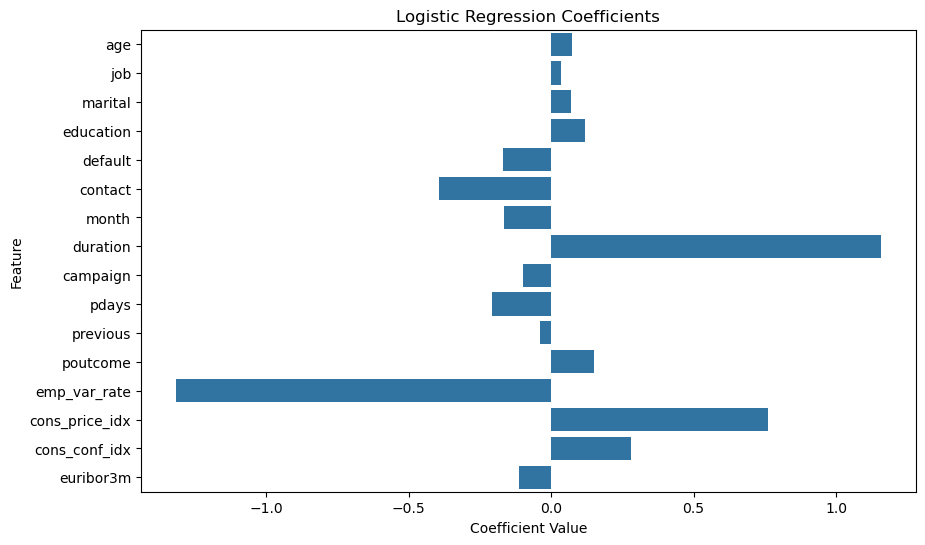

In [113]:
# Plotting the coefficients using matplotlib and seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coeff_df)
plt.title('Logistic Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

##### Questions

A few questions we can ask about the dataset and the campaign are:
1. How many days before the campaign should the bank contact the customers. The duration of the call and the pdays and previous days in the current dataset is not providing enough information to determine the success of the campaign
2. While we see a negative correlation around employment variation rate, it does not translate to any meaningful decisions.
3. There is a good correlation between the duration of the call and contact type. Customers with cellphones show higher reach. The campaign can focus on improving the success by focusing on customers with cellphones